In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('num_df_train.csv')
df

,Cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,1,10,126.291271,2.416707,4.779198,126.291271,1.226129,5.510144,5.258896,...,11.160285,157.462679,1463.720435,7.318602,67876,151,492,548,40.194444,23.333333
1,0,1,10,122.306081,2.416770,4.780587,122.306081,1.210951,5.485277,5.306958,...,11.127219,155.307010,1441.772471,7.067512,63926,148,478,531,41.194444,22.944444
2,0,0,0,28.571924,2.388244,4.711441,28.571924,1.298724,4.022190,4.121727,...,9.874522,69.492153,329.038961,9.677616,1165,31,114,132,6.777778,4.833333
3,0,0,0,27.097139,2.488091,4.835581,27.097139,1.290340,3.985187,3.966880,...,10.022470,69.396660,349.031356,9.433280,902,34,112,134,7.138889,4.583333
4,0,1,10,132.321058,2.416813,4.810016,132.321058,1.213955,5.567384,5.479180,...,11.267217,163.855774,1557.759855,7.382748,77098,162,524,585,43.618056,24.527778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,1,0,0,35.981349,2.454850,4.909699,35.981349,1.240736,4.287898,4.177238,...,10.330160,64.664490,414.197714,7.020300,2578,48,152,178,11.062500,6.250000
3436,1,0,0,38.070420,2.424294,4.848587,38.070420,1.312773,4.302425,4.531875,...,10.287218,64.627285,381.147727,7.940578,2372,42,150,175,7.638889,6.583333
3437,1,0,2,49.867009,2.452215,4.904315,49.867009,1.278641,4.597720,4.885288,...,10.597809,83.963738,538.266794,7.475928,5435,66,210,245,12.395833,8.277778
3438,1,1,0,47.111260,2.439942,4.879884,47.111260,1.273277,4.532706,5.120482,...,10.552709,73.833590,541.071988,9.837673,4596,63,194,229,13.305556,8.138889


For all the models, we first do internal validation, then external validation. The internal validation is done by splitting the training data into training and validation sets. The external validation is done by using the test data. We will get both internal and external validation scores and compare them to see if the model is overfitting or not. We will also use the internal validation scores to tune the hyperparameters of the models (if any).

In [3]:
# Let's do the train test split first
from sklearn.model_selection import train_test_split
X = df.drop('Cls', axis=1)
y = df['Cls']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
df_test = pd.read_csv('num_df_test.csv')
X_test_external = df_test.drop('Cls', axis=1)
y_test_external = df_test['Cls']

In [8]:
def evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
    from sklearn.metrics import log_loss, balanced_accuracy_score, confusion_matrix, classification_report
    from sklearn.model_selection import learning_curve
    from sklearn.metrics import roc_curve, auc
    # Train the model
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("AUC-PR (Average Precision):", average_precision)
    print("Matthew's Correlation Coefficient (MCC):", mcc)
    print("Log Loss:", logloss)
    print("Balanced Accuracy:", balanced_acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-',
             color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-',
             color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()

# Example usage:
# evaluate_model(perceptron, X_train, X_test, y_train, y_test)

# SVM

Internal validation

Accuracy: 0.4898255813953488
Precision: 0.47597597597597596
Recall: 0.9937304075235109
F1-Score: 0.6436548223350254
AUC-ROC: 0.5239654747644655
AUC-PR (Average Precision): 0.4758987773221935
Matthew's Correlation Coefficient (MCC): 0.13585514871878634
Log Loss: 18.388549912180405
Balanced Accuracy: 0.5239654747644655
Confusion Matrix:
[[ 20 349]
 [  2 317]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.05      0.10       369
           1       0.48      0.99      0.64       319

    accuracy                           0.49       688
   macro avg       0.69      0.52      0.37       688
weighted avg       0.71      0.49      0.35       688



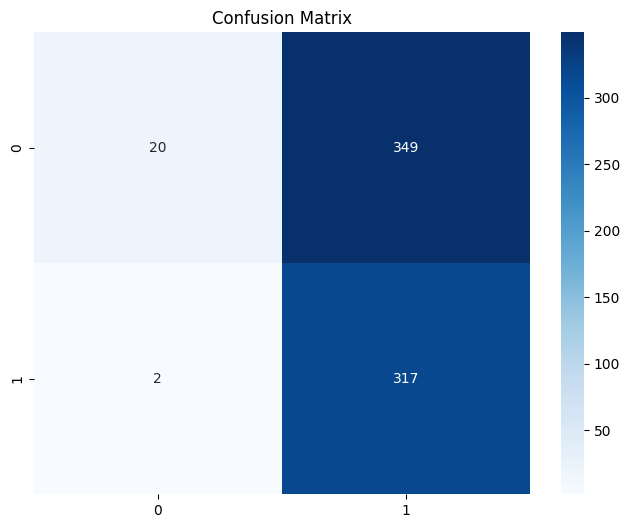

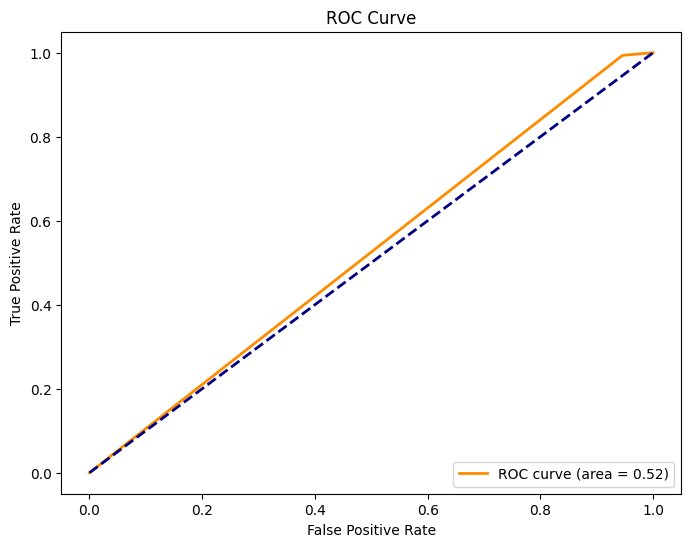

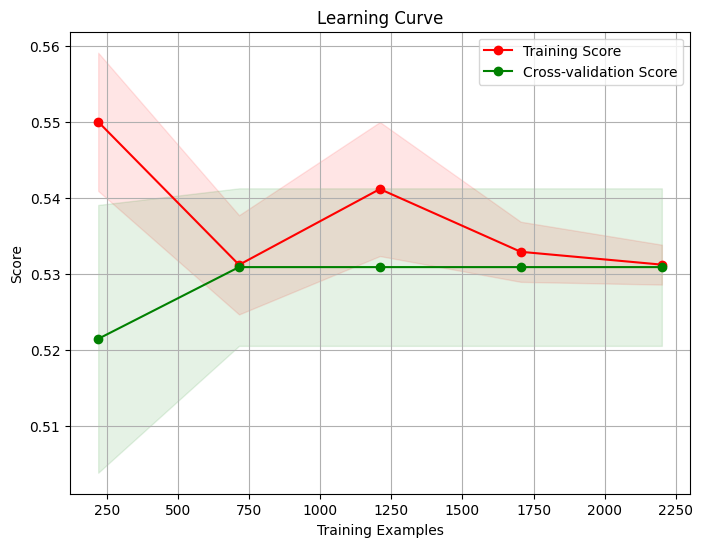

In [10]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC()

# Call the evaluate_model function with SVM classifier
evaluate_model(svm_classifier, X_train, X_test, y_train, y_test)

External Validation

Accuracy: 0.5127906976744186
Precision: 0.506508875739645
Recall: 0.9953488372093023
F1-Score: 0.6713725490196079
AUC-ROC: 0.5127906976744185
AUC-PR (Average Precision): 0.5064786018989955
Matthew's Correlation Coefficient (MCC): 0.09770543017055205
Log Loss: 17.560803220976844
Balanced Accuracy: 0.5127906976744186
Confusion Matrix:
[[ 13 417]
 [  2 428]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.03      0.06       430
           1       0.51      1.00      0.67       430

    accuracy                           0.51       860
   macro avg       0.69      0.51      0.36       860
weighted avg       0.69      0.51      0.36       860



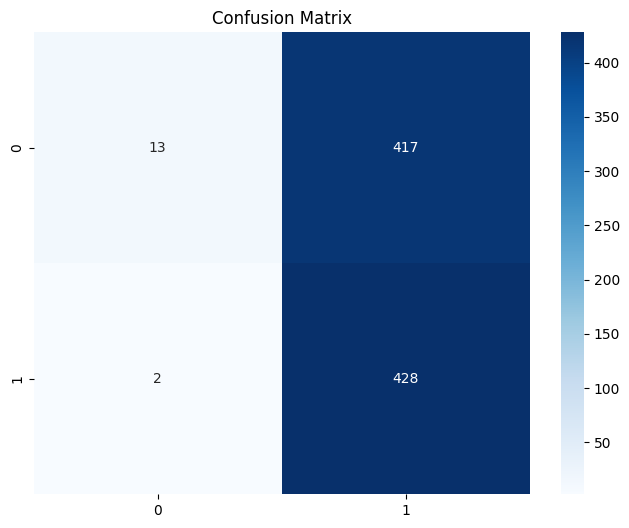

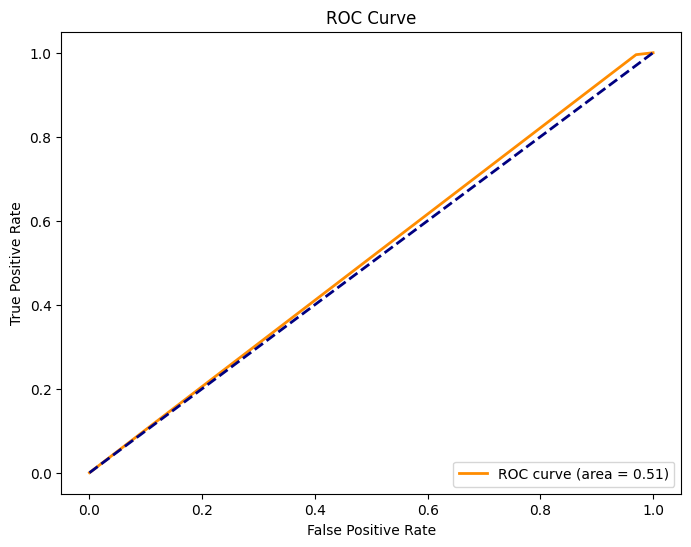

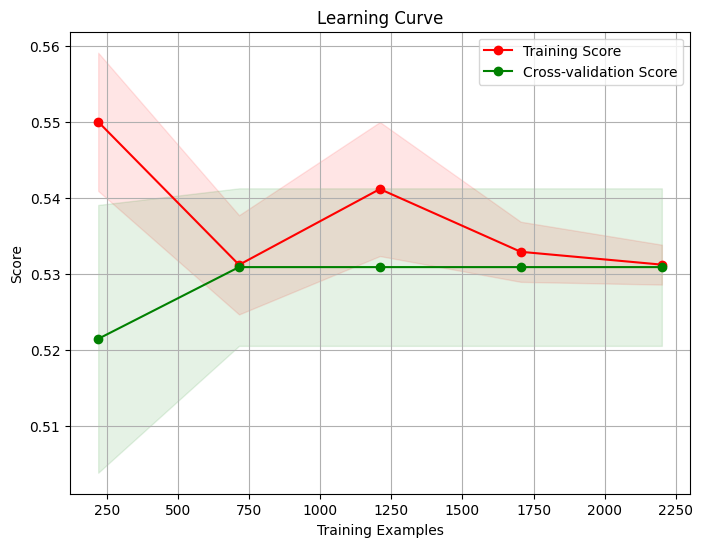

In [11]:
evaluate_model(svm_classifier, X_train, X_test_external,
               y_train, y_test_external)

# KNN

Internal validation

Internal Validation for KNN:
Accuracy: 0.7005813953488372
Precision: 0.6423173803526449
Recall: 0.799373040752351
F1-Score: 0.712290502793296
AUC-ROC: 0.7072745962569343
AUC-PR (Average Precision): 0.6064744532745316
Matthew's Correlation Coefficient (MCC): 0.4184493044123728
Log Loss: 10.792140404299612
Balanced Accuracy: 0.7072745962569343
Confusion Matrix:
[[227 142]
 [ 64 255]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.62      0.69       369
           1       0.64      0.80      0.71       319

    accuracy                           0.70       688
   macro avg       0.71      0.71      0.70       688
weighted avg       0.72      0.70      0.70       688



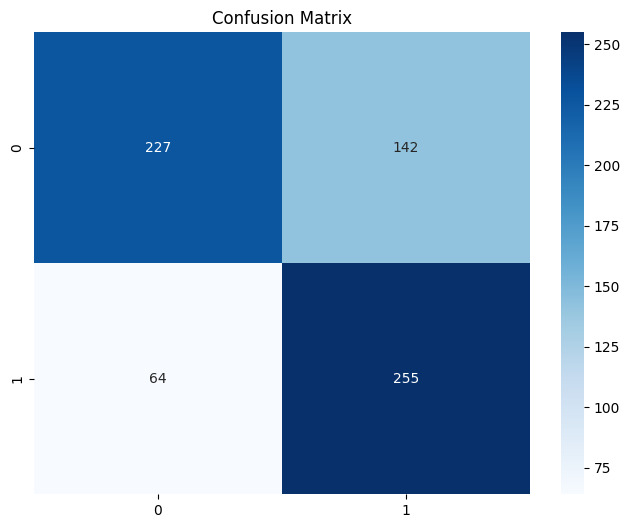

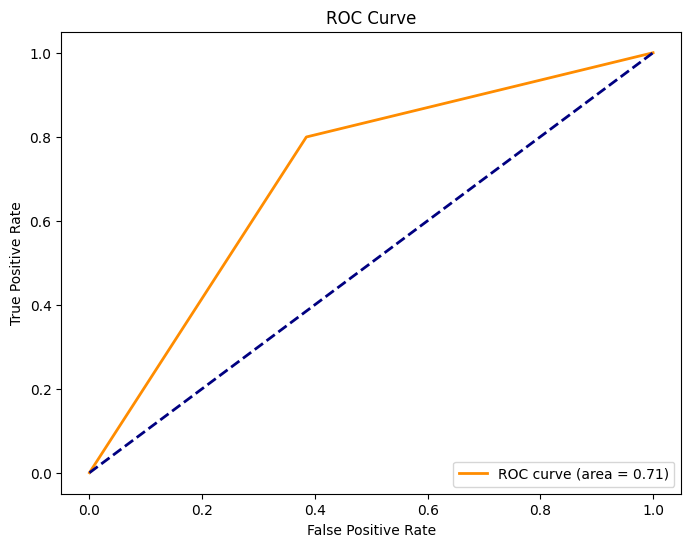

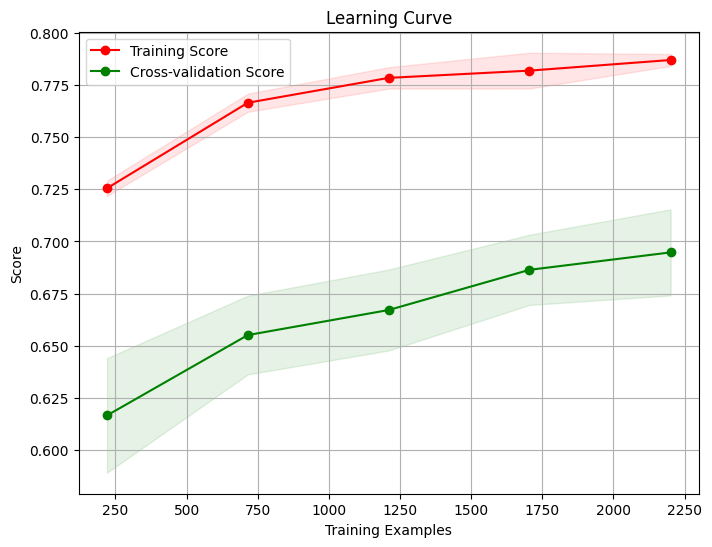

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the KNN model on the training data
knn_classifier.fit(X_train, y_train)

# Evaluate the KNN model on the internal test set
print("Internal Validation for KNN:")
evaluate_model(knn_classifier, X_train, X_test, y_train, y_test)

External Validation

External Validation for KNN:
Accuracy: 0.6581395348837209
Precision: 0.6446808510638298
Recall: 0.7046511627906977
F1-Score: 0.6733333333333333
AUC-ROC: 0.6581395348837209
AUC-PR (Average Precision): 0.6019495299356754
Matthew's Correlation Coefficient (MCC): 0.31765644838959517
Log Loss: 12.321900112093537
Balanced Accuracy: 0.6581395348837209
Confusion Matrix:
[[263 167]
 [127 303]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       430
           1       0.64      0.70      0.67       430

    accuracy                           0.66       860
   macro avg       0.66      0.66      0.66       860
weighted avg       0.66      0.66      0.66       860



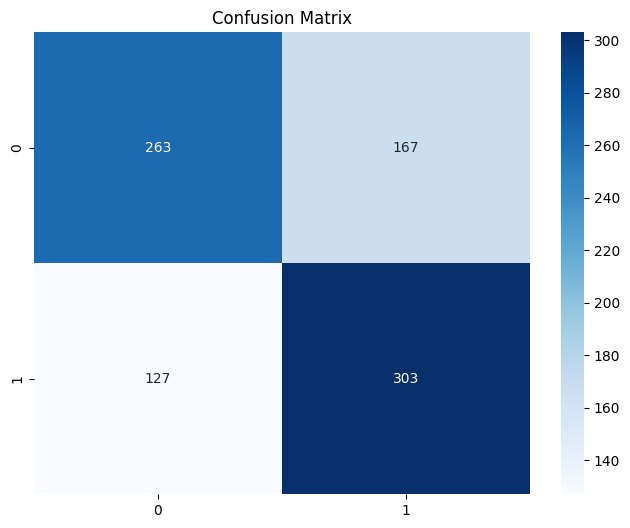

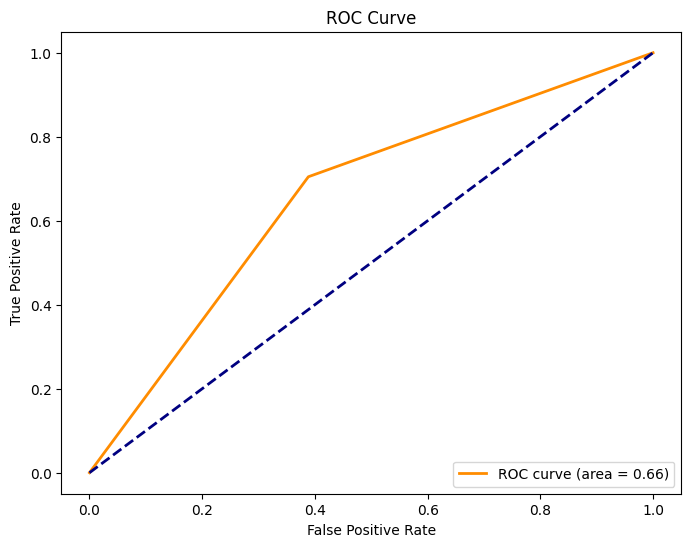

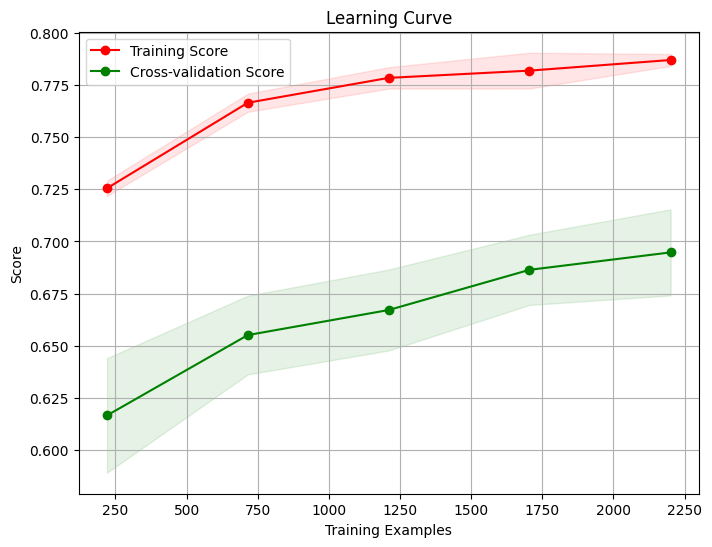

In [13]:
print("External Validation for KNN:")
evaluate_model(knn_classifier, X_train, X_test_external,
               y_train, y_test_external)

# Logistic Regression

Internal validation

Accuracy: 0.498546511627907
Precision: 0.4803030303030303
Recall: 0.9937304075235109
F1-Score: 0.6475995914198162
AUC-ROC: 0.5320955560652786
AUC-PR (Average Precision): 0.48019870278199356
Matthew's Correlation Coefficient (MCC): 0.16200650060084384
Log Loss: 18.074215725647406
Balanced Accuracy: 0.5320955560652785
Confusion Matrix:
[[ 26 343]
 [  2 317]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.07      0.13       369
           1       0.48      0.99      0.65       319

    accuracy                           0.50       688
   macro avg       0.70      0.53      0.39       688
weighted avg       0.72      0.50      0.37       688



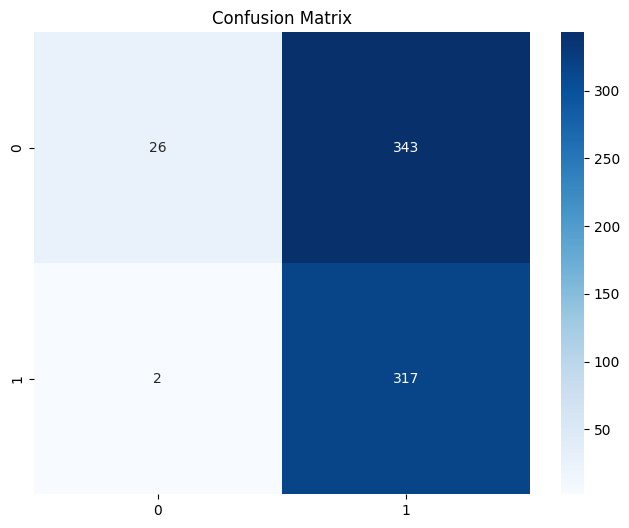

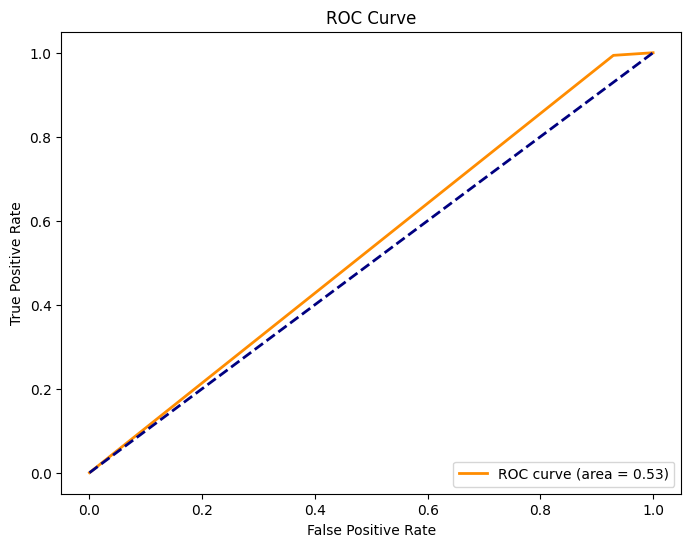

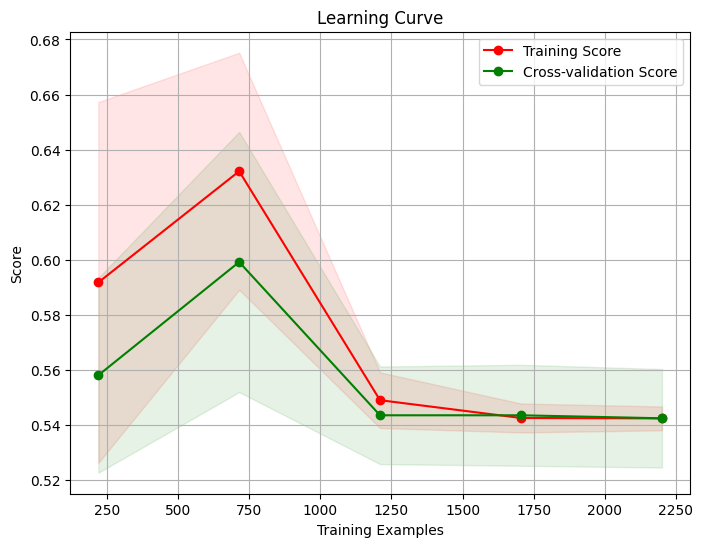

In [14]:
from sklearn.linear_model import LogisticRegression

logistic_regression_classifier = LogisticRegression()

evaluate_model(logistic_regression_classifier,
               X_train, X_test, y_train, y_test)

External validation

Accuracy: 0.5093023255813953
Precision: 0.5047732696897375
Recall: 0.9837209302325581
F1-Score: 0.6671924290220821
AUC-ROC: 0.5093023255813953
AUC-PR (Average Precision): 0.5046955652994394
Matthew's Correlation Coefficient (MCC): 0.058919172306335185
Log Loss: 17.68653689559004
Balanced Accuracy: 0.5093023255813953
Confusion Matrix:
[[ 15 415]
 [  7 423]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.03      0.07       430
           1       0.50      0.98      0.67       430

    accuracy                           0.51       860
   macro avg       0.59      0.51      0.37       860
weighted avg       0.59      0.51      0.37       860



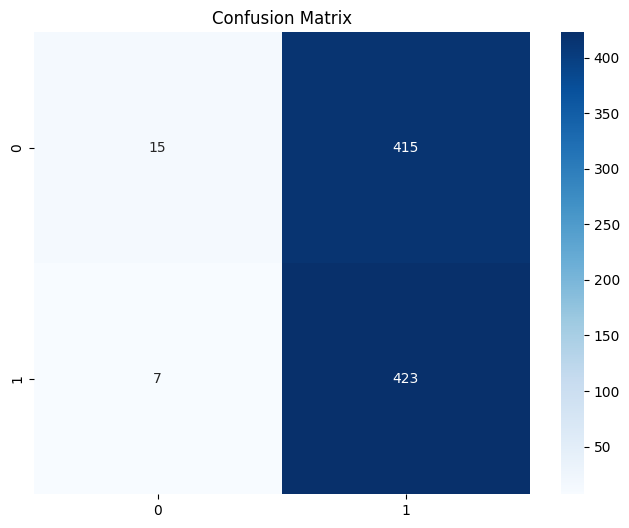

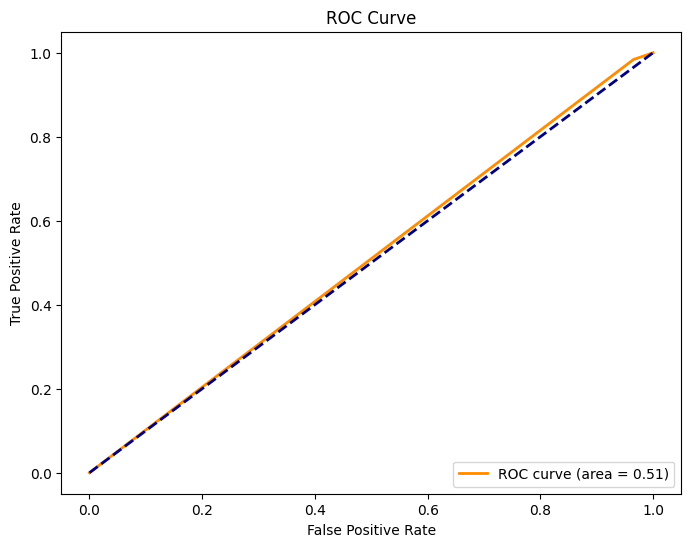

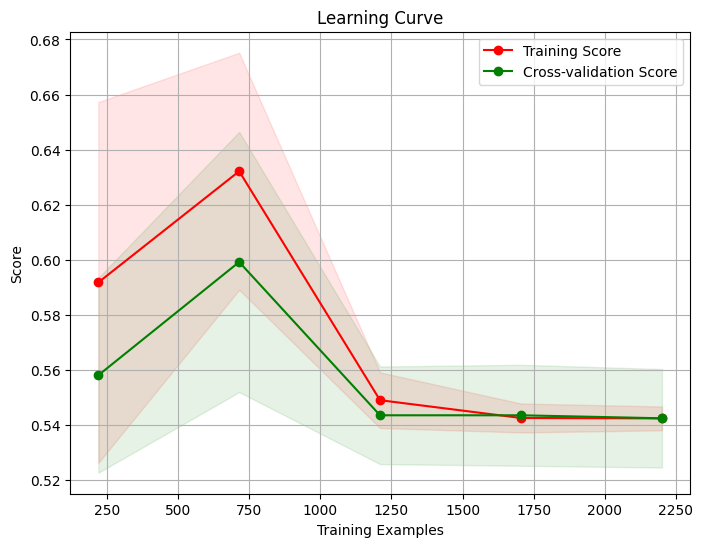

In [15]:
evaluate_model(logistic_regression_classifier, X_train,
               X_test_external, y_train, y_test_external)

# Decision Tree

Internal Validation

Accuracy: 0.7383720930232558
Precision: 0.7151702786377709
Recall: 0.7241379310344828
F1-Score: 0.7196261682242989
AUC-ROC: 0.7374077189047752
AUC-PR (Average Precision): 0.645788902654296
Matthew's Correlation Coefficient (MCC): 0.4744447683347436
Log Loss: 9.430025595989951
Balanced Accuracy: 0.7374077189047752
Confusion Matrix:
[[277  92]
 [ 88 231]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       369
           1       0.72      0.72      0.72       319

    accuracy                           0.74       688
   macro avg       0.74      0.74      0.74       688
weighted avg       0.74      0.74      0.74       688



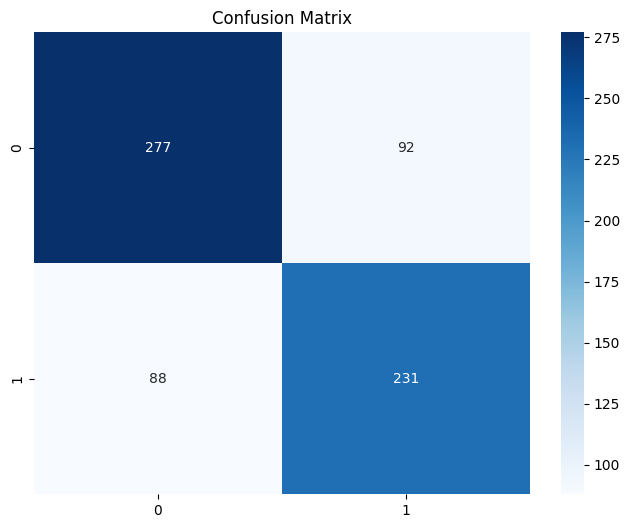

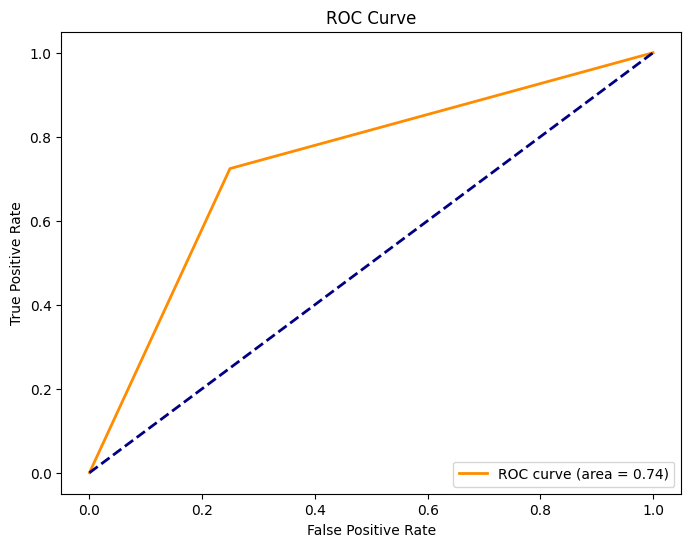

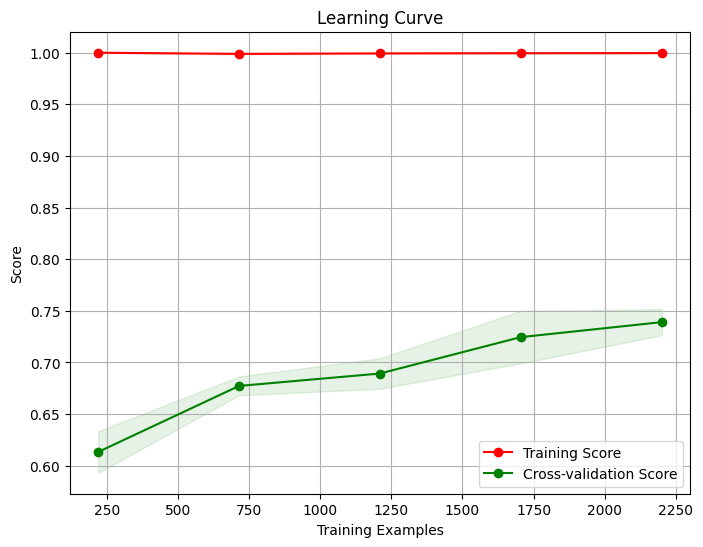

In [16]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()

evaluate_model(decision_tree_classifier, X_train, X_test, y_train, y_test)

External Validation

Accuracy: 0.6790697674418604
Precision: 0.7175141242937854
Recall: 0.5906976744186047
F1-Score: 0.6479591836734694
AUC-ROC: 0.6790697674418604
AUC-PR (Average Precision): 0.6284850873735384
Matthew's Correlation Coefficient (MCC): 0.3638679729572846
Log Loss: 11.567498064414341
Balanced Accuracy: 0.6790697674418604
Confusion Matrix:
[[330 100]
 [176 254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       430
           1       0.72      0.59      0.65       430

    accuracy                           0.68       860
   macro avg       0.68      0.68      0.68       860
weighted avg       0.68      0.68      0.68       860



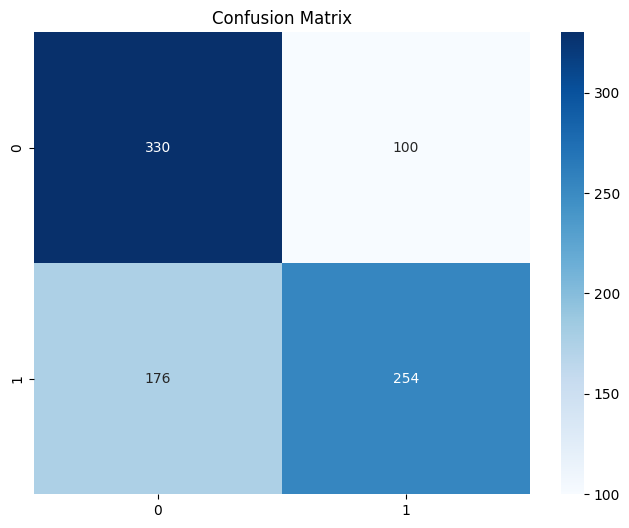

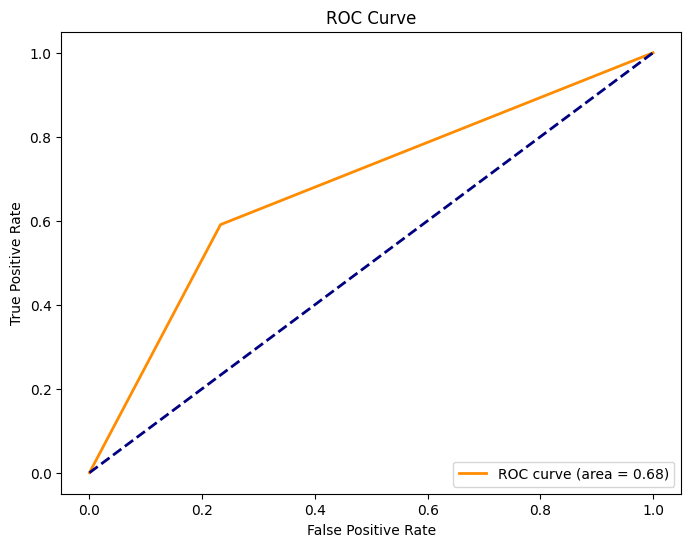

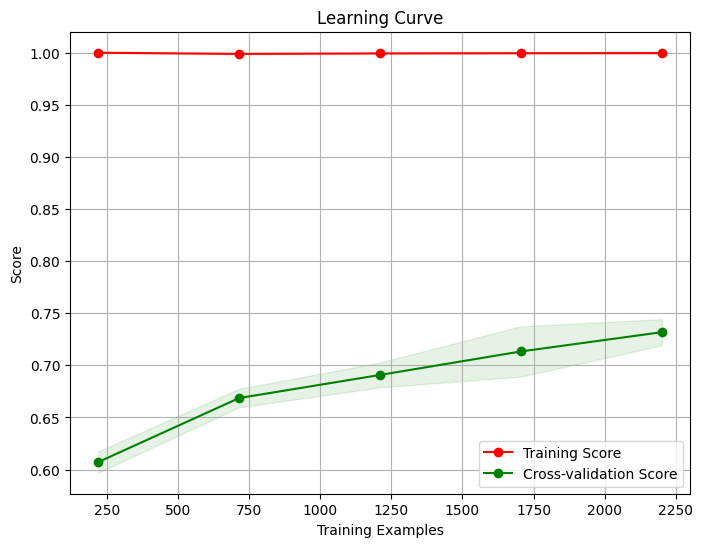

In [17]:
evaluate_model(decision_tree_classifier, X_train,
               X_test_external, y_train, y_test_external)

# Random Forest

Internal Validation

Accuracy: 0.815406976744186
Precision: 0.7857142857142857
Recall: 0.8275862068965517
F1-Score: 0.8061068702290076
AUC-ROC: 0.8162321278385198
AUC-PR (Average Precision): 0.7301881658838355
Matthew's Correlation Coefficient (MCC): 0.6309624877435781
Log Loss: 6.6534069482818
Balanced Accuracy: 0.8162321278385198
Confusion Matrix:
[[297  72]
 [ 55 264]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       369
           1       0.79      0.83      0.81       319

    accuracy                           0.82       688
   macro avg       0.81      0.82      0.81       688
weighted avg       0.82      0.82      0.82       688



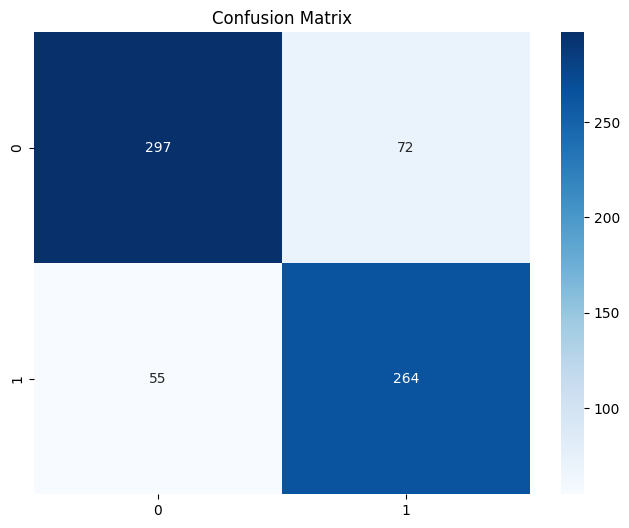

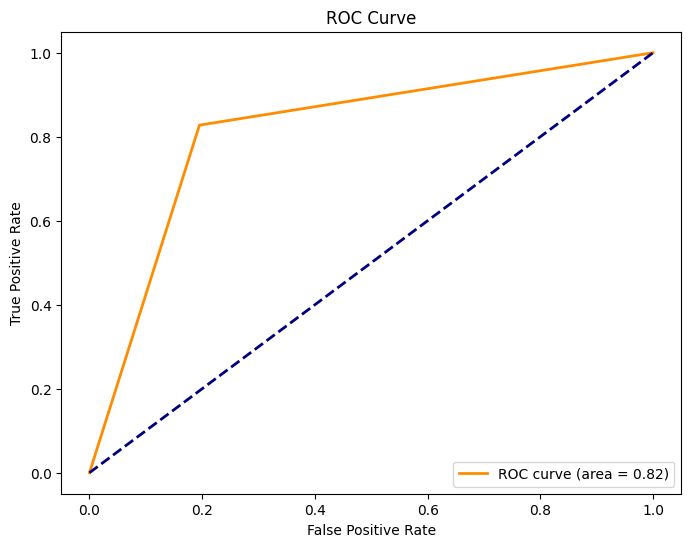

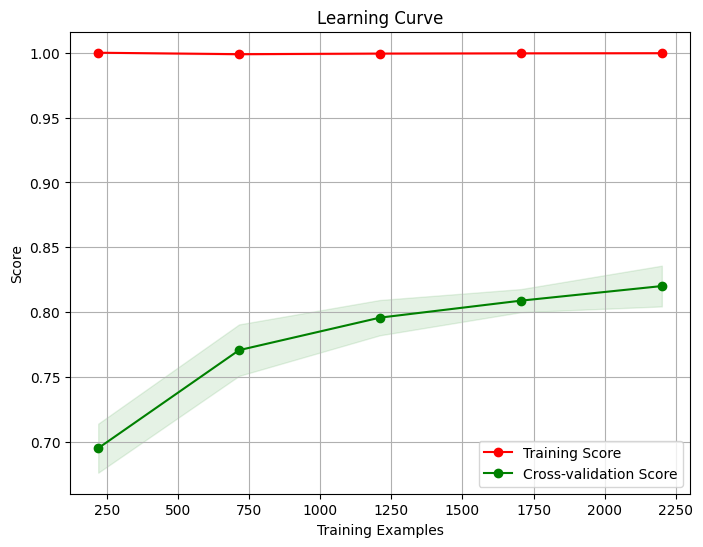

In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

evaluate_model(random_forest_classifier, X_train, X_test, y_train, y_test)

External Validation

Accuracy: 0.858139534883721
Precision: 0.9375
Recall: 0.7674418604651163
F1-Score: 0.843989769820972
AUC-ROC: 0.858139534883721
AUC-PR (Average Precision): 0.8357558139534884
Matthew's Correlation Coefficient (MCC): 0.7283624173607683
Log Loss: 5.113169434270108
Balanced Accuracy: 0.858139534883721
Confusion Matrix:
[[408  22]
 [100 330]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       430
           1       0.94      0.77      0.84       430

    accuracy                           0.86       860
   macro avg       0.87      0.86      0.86       860
weighted avg       0.87      0.86      0.86       860



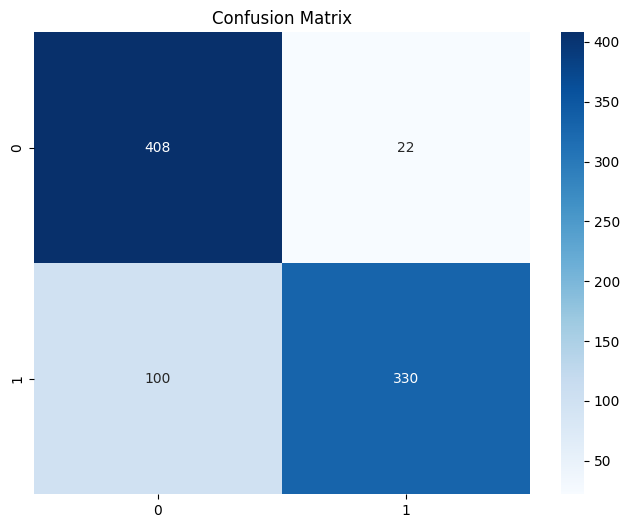

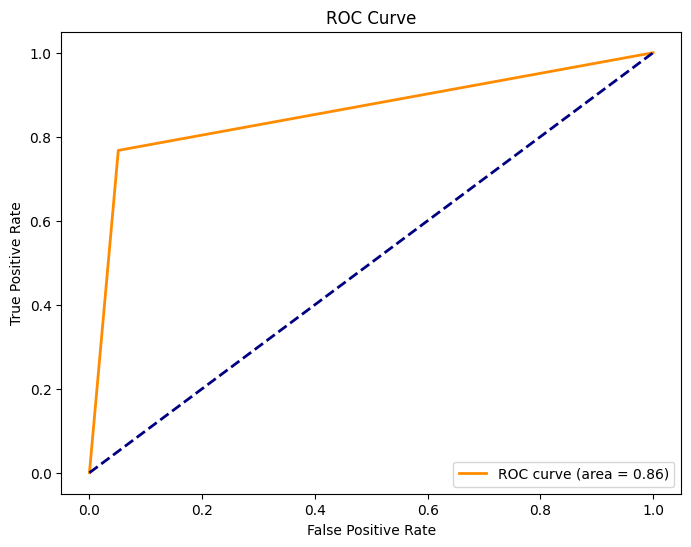

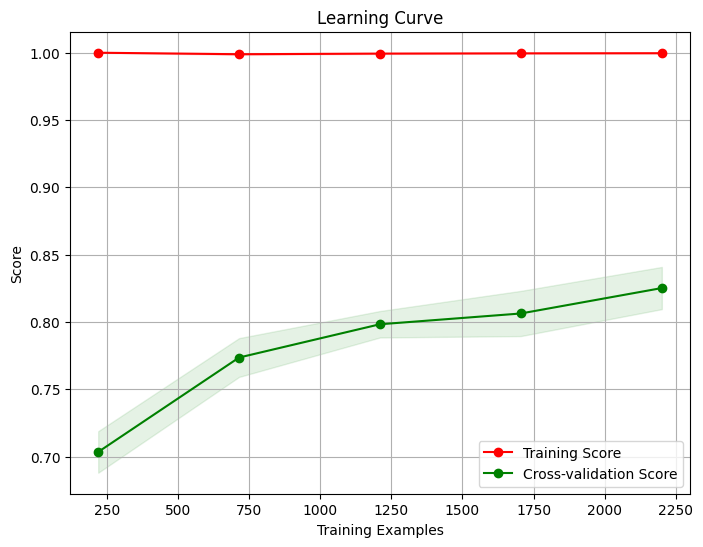

In [19]:
evaluate_model(random_forest_classifier, X_train,
               X_test_external, y_train, y_test_external)

# GBM

internal validation

Accuracy: 0.8081395348837209
Precision: 0.7648725212464589
Recall: 0.8463949843260188
F1-Score: 0.8035714285714286
AUC-ROC: 0.8107313675017628
AUC-PR (Average Precision): 0.7186051958643572
Matthew's Correlation Coefficient (MCC): 0.6200316520425305
Log Loss: 6.915352103725965
Balanced Accuracy: 0.8107313675017628
Confusion Matrix:
[[286  83]
 [ 49 270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       369
           1       0.76      0.85      0.80       319

    accuracy                           0.81       688
   macro avg       0.81      0.81      0.81       688
weighted avg       0.81      0.81      0.81       688



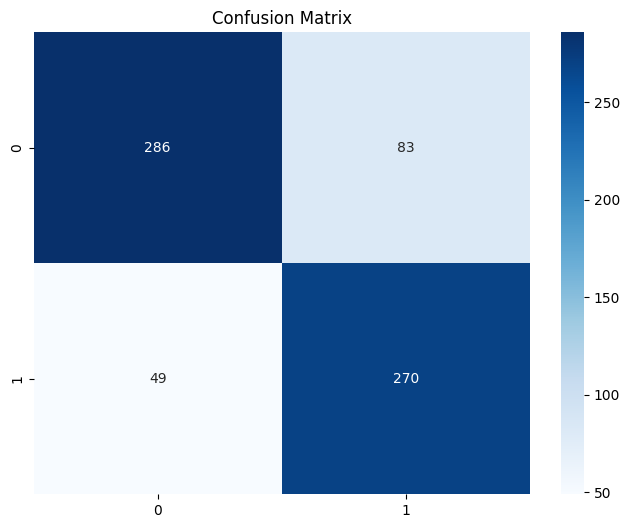

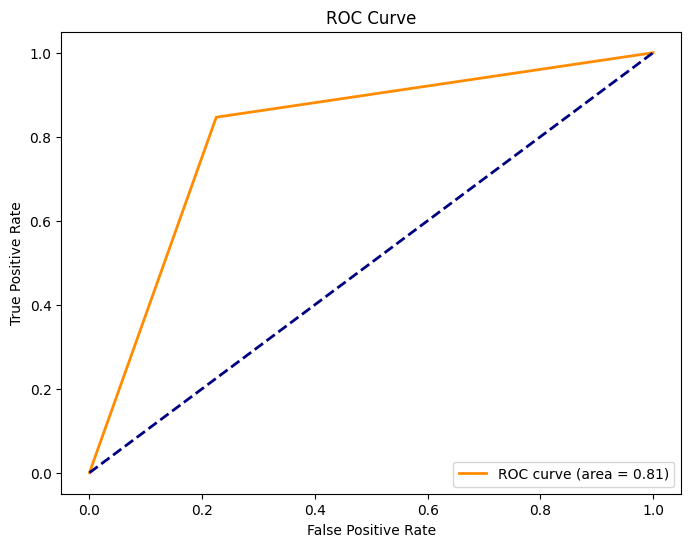

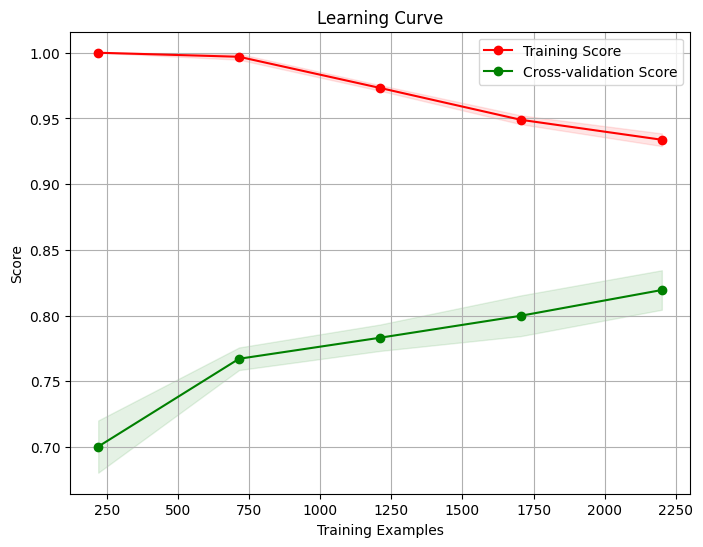

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier()

evaluate_model(gbm_classifier, X_train, X_test, y_train, y_test)

External Validation

Accuracy: 0.8860465116279069
Precision: 0.9068627450980392
Recall: 0.8604651162790697
F1-Score: 0.8830548926014319
AUC-ROC: 0.886046511627907
AUC-PR (Average Precision): 0.8500911992704058
Matthew's Correlation Coefficient (MCC): 0.773105538859229
Log Loss: 4.107300037364513
Balanced Accuracy: 0.886046511627907
Confusion Matrix:
[[392  38]
 [ 60 370]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       430
           1       0.91      0.86      0.88       430

    accuracy                           0.89       860
   macro avg       0.89      0.89      0.89       860
weighted avg       0.89      0.89      0.89       860



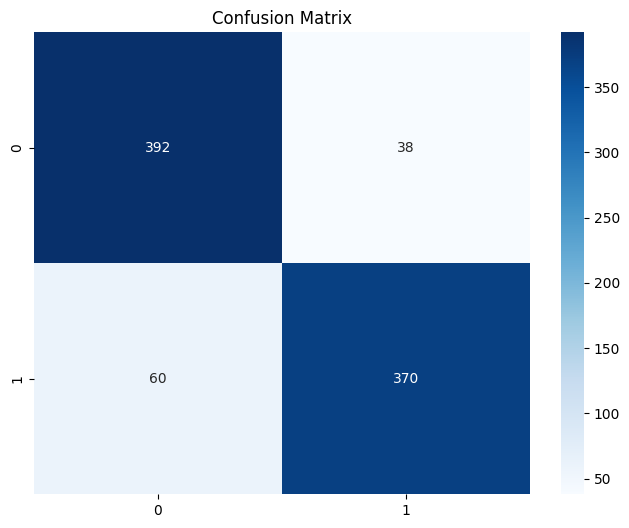

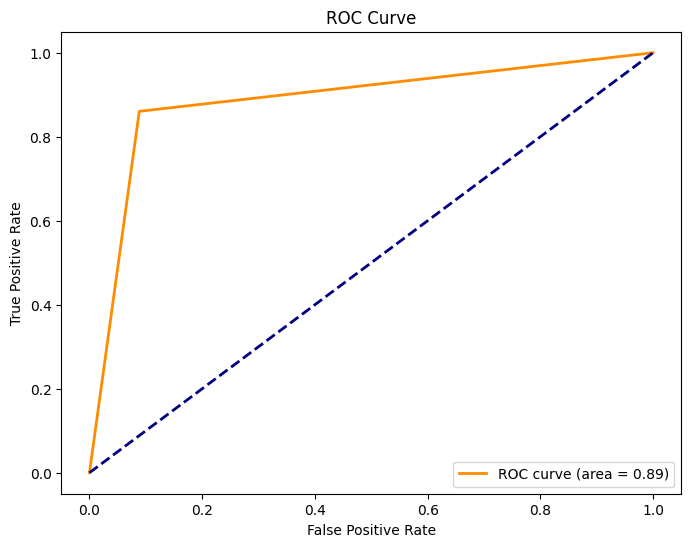

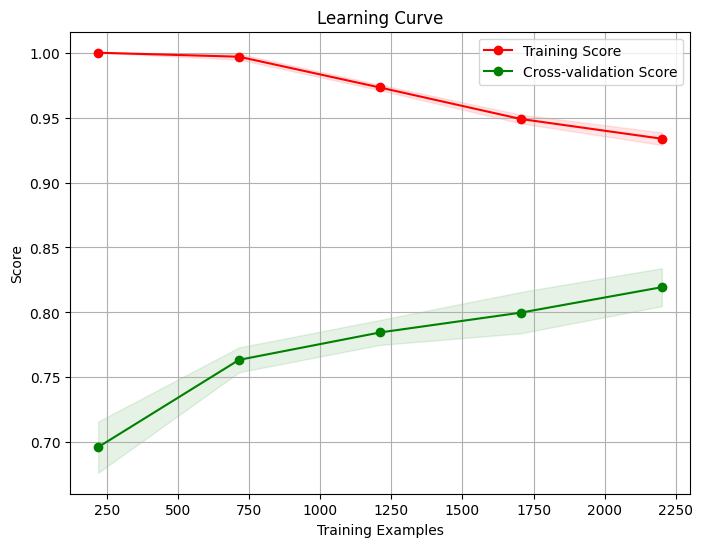

In [21]:
evaluate_model(gbm_classifier, X_train, X_test_external,
               y_train, y_test_external)

# XGBoost

Internal Validation

Accuracy: 0.8313953488372093
Precision: 0.792507204610951
Recall: 0.8620689655172413
F1-Score: 0.8258258258258258
AUC-ROC: 0.8334735071488646
AUC-PR (Average Precision): 0.7471493544160163
Matthew's Correlation Coefficient (MCC): 0.6652087151116484
Log Loss: 6.077127606304636
Balanced Accuracy: 0.8334735071488646
Confusion Matrix:
[[297  72]
 [ 44 275]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       369
           1       0.79      0.86      0.83       319

    accuracy                           0.83       688
   macro avg       0.83      0.83      0.83       688
weighted avg       0.83      0.83      0.83       688



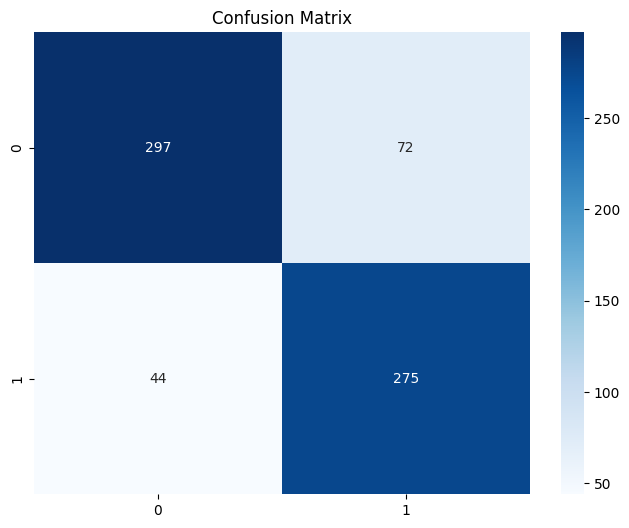

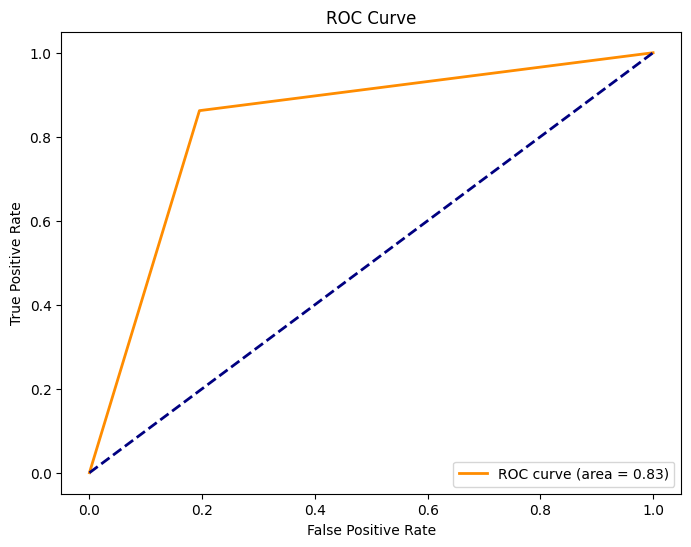

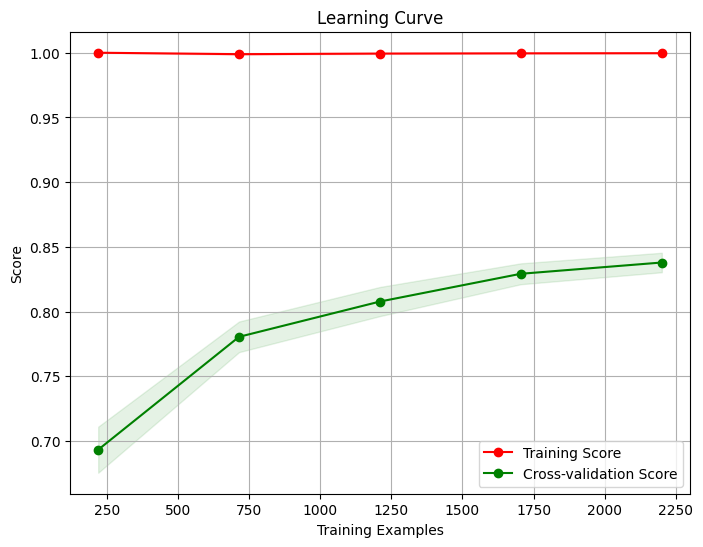

In [22]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

evaluate_model(xgb_classifier, X_train, X_test, y_train, y_test)

External Validation

Accuracy: 0.9127906976744186
Precision: 0.9493670886075949
Recall: 0.872093023255814
F1-Score: 0.9090909090909091
AUC-ROC: 0.9127906976744187
AUC-PR (Average Precision): 0.8918899028554607
Matthew's Correlation Coefficient (MCC): 0.8283298819660155
Log Loss: 3.1433418653299836
Balanced Accuracy: 0.9127906976744187
Confusion Matrix:
[[410  20]
 [ 55 375]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       430
           1       0.95      0.87      0.91       430

    accuracy                           0.91       860
   macro avg       0.92      0.91      0.91       860
weighted avg       0.92      0.91      0.91       860



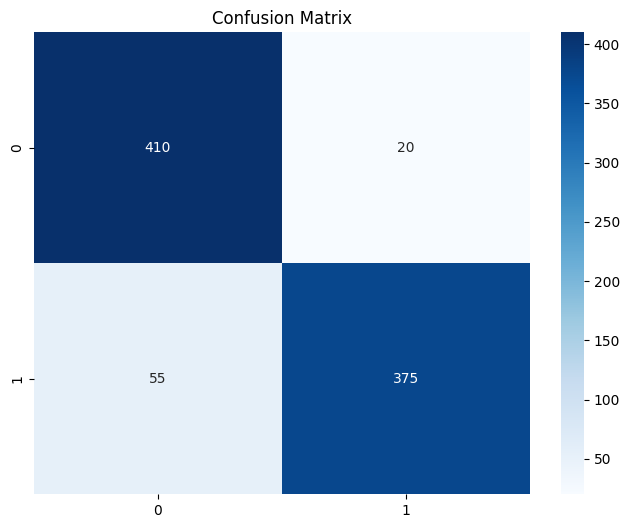

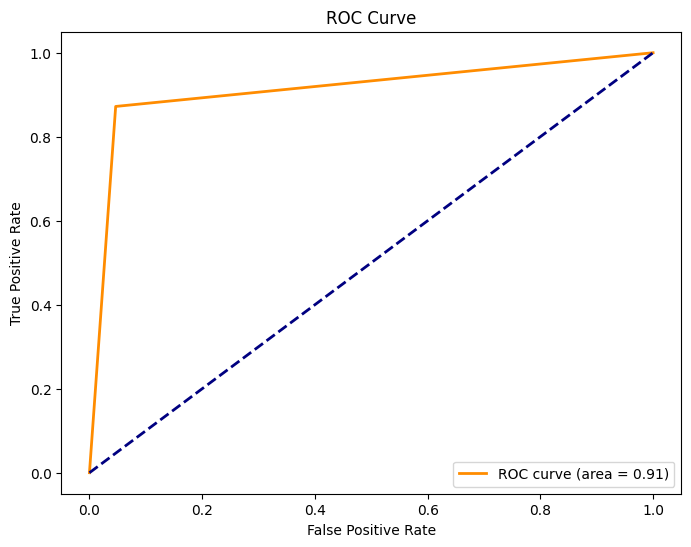

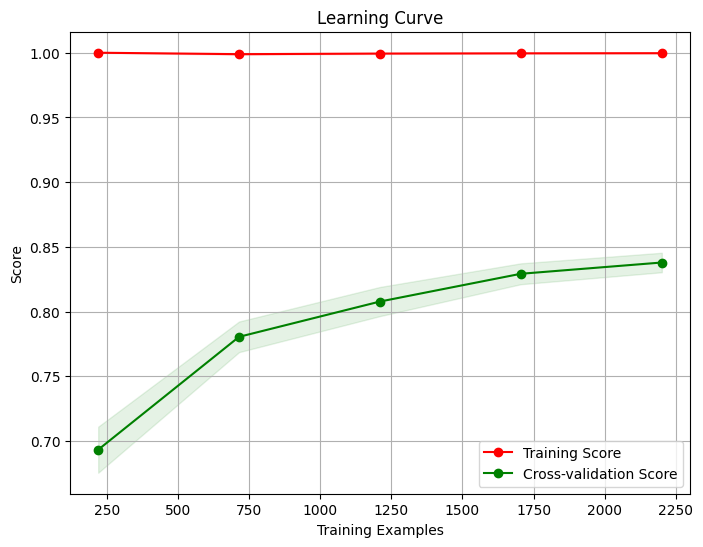

In [23]:
evaluate_model(xgb_classifier, X_train, X_test_external,
               y_train, y_test_external)

# LightGBM

Internal Validation

In [24]:
!pip install lightgbm

[LightGBM] [Info] Number of positive: 1401, number of negative: 1351
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 283594
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 1323
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509084 -> initscore=0.036341
[LightGBM] [Info] Start training from score 0.036341
Accuracy: 0.8313953488372093
Precision: 0.799410029498525
Recall: 0.8495297805642633
F1-Score: 0.82370820668693
AUC-ROC: 0.8326239688729176
AUC-PR (Average Precision): 0.7488900688012183
Matthew's Correlation Coefficient (MCC): 0.6635589311924835
Log Loss: 6.077127606304636
Balanced Accuracy: 0.8326239688729176
Confusion Matrix:
[[301  68]
 [ 48 271]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       369
           1       0.

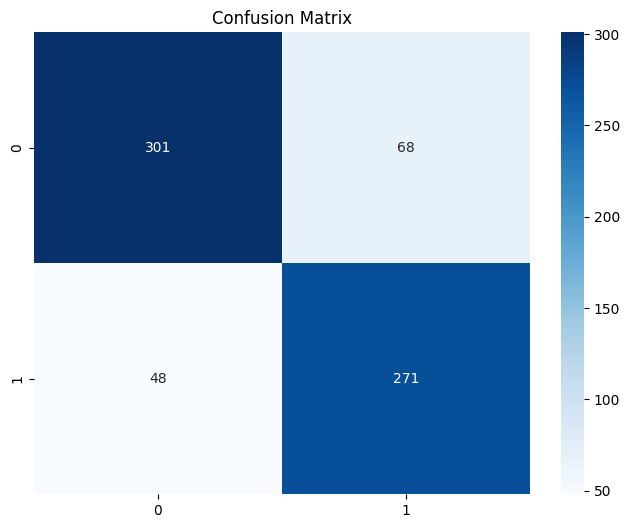

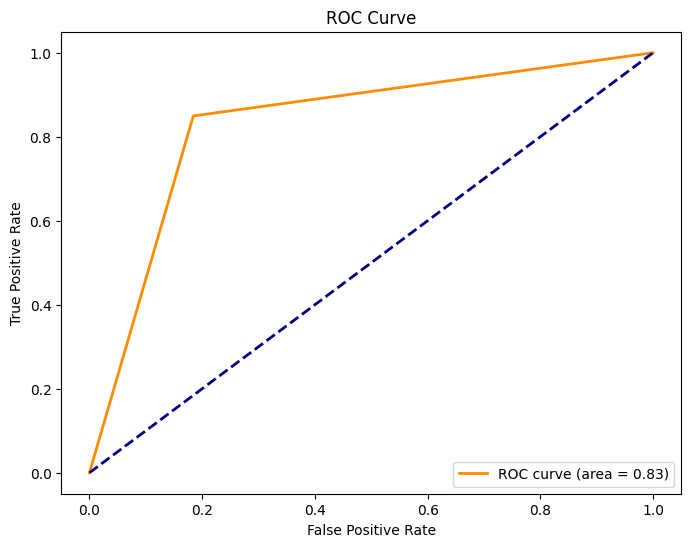

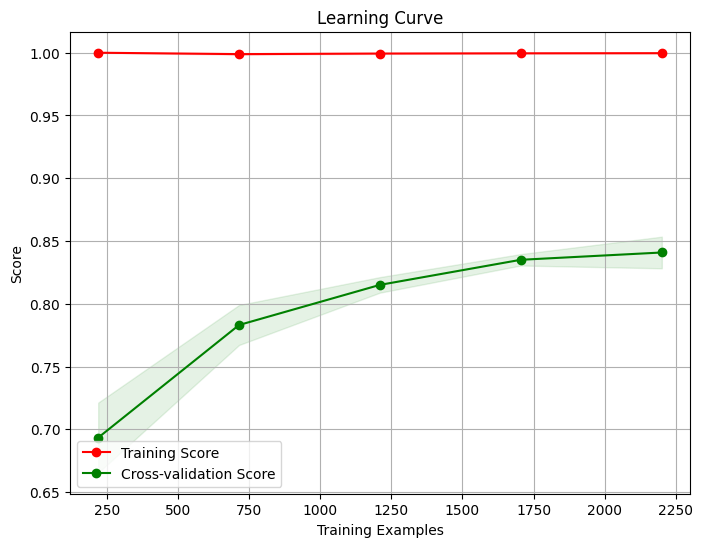

In [25]:
import lightgbm as lgb

lgb_classifier = lgb.LGBMClassifier()

evaluate_model(lgb_classifier, X_train, X_test, y_train, y_test)

External Validation

[LightGBM] [Info] Number of positive: 1401, number of negative: 1351
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 283594
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 1323
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509084 -> initscore=0.036341
[LightGBM] [Info] Start training from score 0.036341
Accuracy: 0.8906976744186047
Precision: 0.9329896907216495
Recall: 0.8418604651162791
F1-Score: 0.8850855745721272
AUC-ROC: 0.8906976744186047
AUC-PR (Average Precision): 0.8645169024214817
Matthew's Correlation Coefficient (MCC): 0.7851496027220238
Log Loss: 3.939655137880247
Balanced Accuracy: 0.8906976744186046
Confusion Matrix:
[[404  26]
 [ 68 362]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       430
           1      

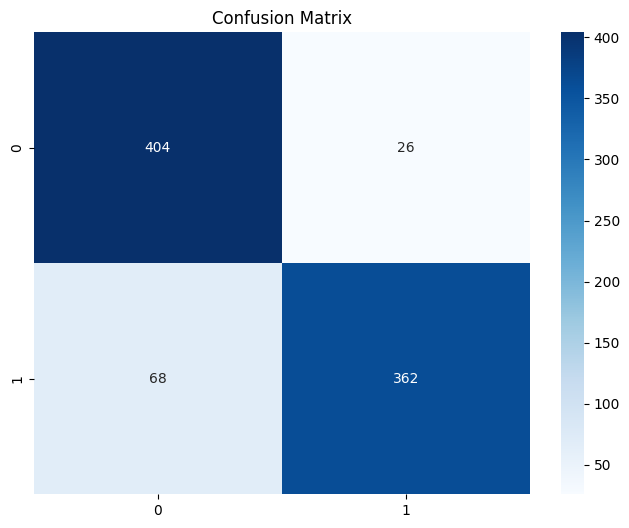

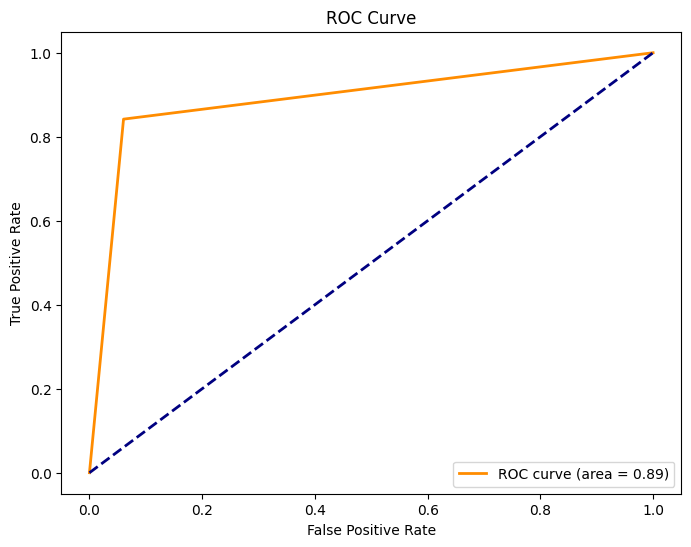

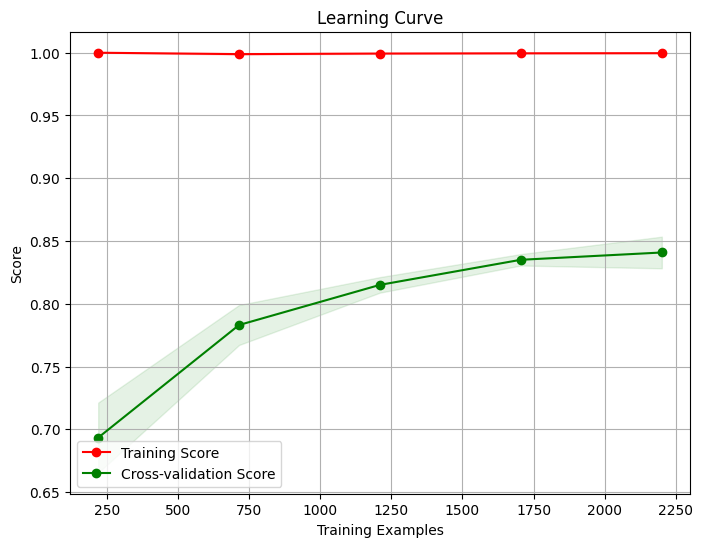

In [26]:
evaluate_model(lgb_classifier, X_train, X_test_external,
               y_train, y_test_external)

# CatBoost

Internal Validation

Learning rate set to 0.015873
0:	learn: 0.6898095	total: 214ms	remaining: 3m 33s
1:	learn: 0.6859235	total: 259ms	remaining: 2m 9s
2:	learn: 0.6828579	total: 303ms	remaining: 1m 40s
3:	learn: 0.6793980	total: 348ms	remaining: 1m 26s
4:	learn: 0.6758309	total: 391ms	remaining: 1m 17s
5:	learn: 0.6728047	total: 436ms	remaining: 1m 12s
6:	learn: 0.6698207	total: 485ms	remaining: 1m 8s
7:	learn: 0.6674403	total: 530ms	remaining: 1m 5s
8:	learn: 0.6646196	total: 577ms	remaining: 1m 3s
9:	learn: 0.6619979	total: 622ms	remaining: 1m 1s
10:	learn: 0.6592065	total: 668ms	remaining: 1m
11:	learn: 0.6564062	total: 714ms	remaining: 58.8s
12:	learn: 0.6543195	total: 761ms	remaining: 57.8s
13:	learn: 0.6515567	total: 806ms	remaining: 56.8s
14:	learn: 0.6485906	total: 854ms	remaining: 56.1s
15:	learn: 0.6463064	total: 902ms	remaining: 55.5s
16:	learn: 0.6438193	total: 949ms	remaining: 54.9s
17:	learn: 0.6408417	total: 995ms	remaining: 54.3s
18:	learn: 0.6380256	total: 1.04s	remaining: 53.7s
19:	learn

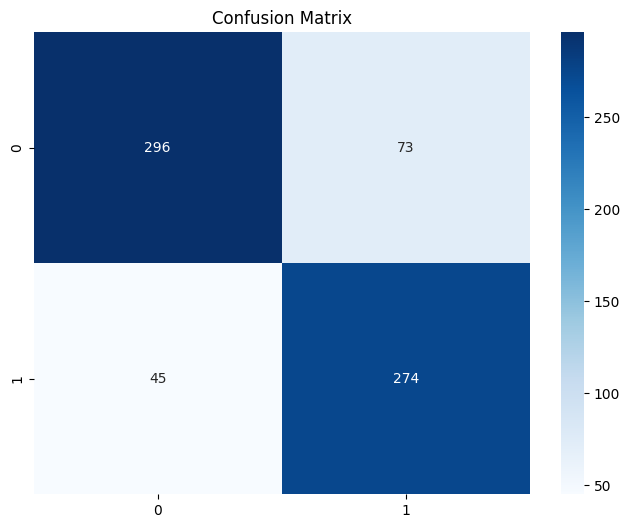

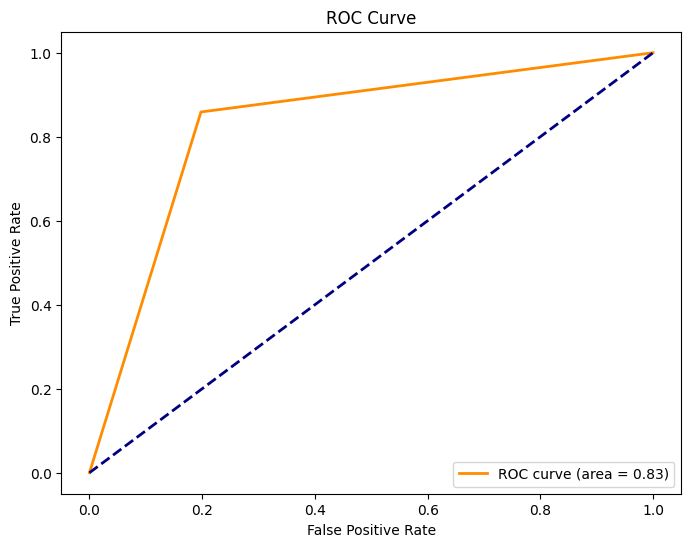

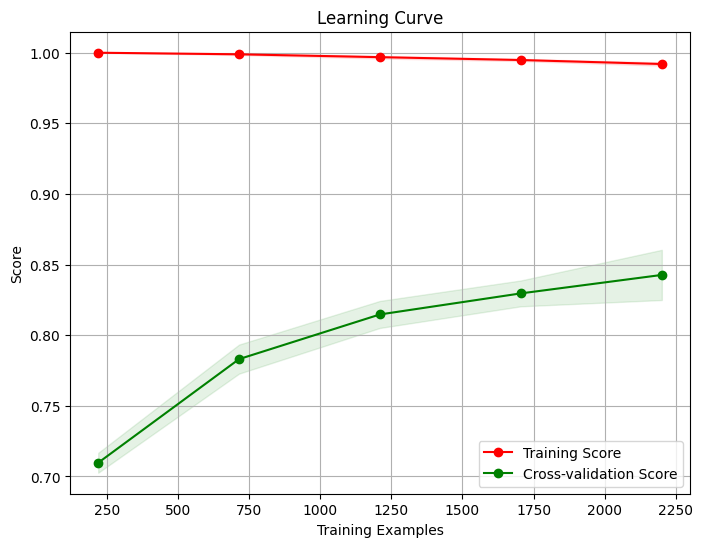

In [27]:
from catboost import CatBoostClassifier

catboost_classifier = CatBoostClassifier()

evaluate_model(catboost_classifier, X_train, X_test, y_train, y_test)

External Validation

Learning rate set to 0.015873
0:	learn: 0.6898095	total: 66.8ms	remaining: 1m 6s
1:	learn: 0.6859235	total: 120ms	remaining: 59.8s
2:	learn: 0.6828579	total: 176ms	remaining: 58.4s
3:	learn: 0.6793980	total: 241ms	remaining: 60s
4:	learn: 0.6758309	total: 294ms	remaining: 58.6s
5:	learn: 0.6728047	total: 346ms	remaining: 57.3s
6:	learn: 0.6698207	total: 398ms	remaining: 56.5s
7:	learn: 0.6674403	total: 447ms	remaining: 55.5s
8:	learn: 0.6646196	total: 498ms	remaining: 54.8s
9:	learn: 0.6619979	total: 549ms	remaining: 54.3s
10:	learn: 0.6592065	total: 600ms	remaining: 54s
11:	learn: 0.6564062	total: 649ms	remaining: 53.4s
12:	learn: 0.6543195	total: 697ms	remaining: 52.9s
13:	learn: 0.6515567	total: 744ms	remaining: 52.4s
14:	learn: 0.6485906	total: 791ms	remaining: 52s
15:	learn: 0.6463064	total: 841ms	remaining: 51.7s
16:	learn: 0.6438193	total: 890ms	remaining: 51.4s
17:	learn: 0.6408417	total: 941ms	remaining: 51.3s
18:	learn: 0.6380256	total: 991ms	remaining: 51.2s
19:	learn: 0.635

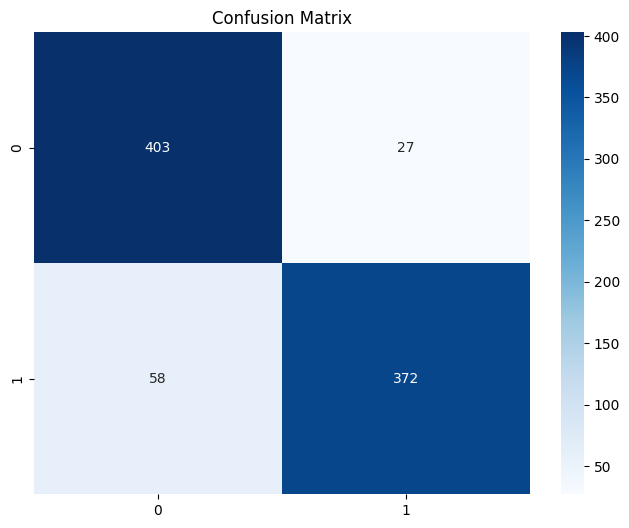

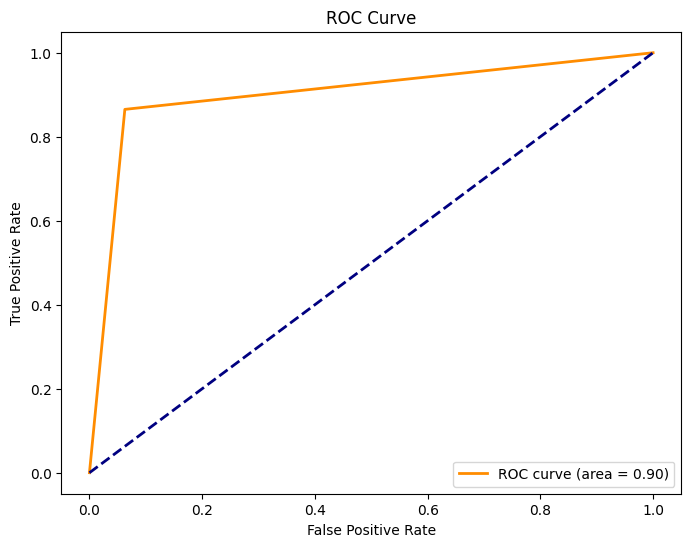

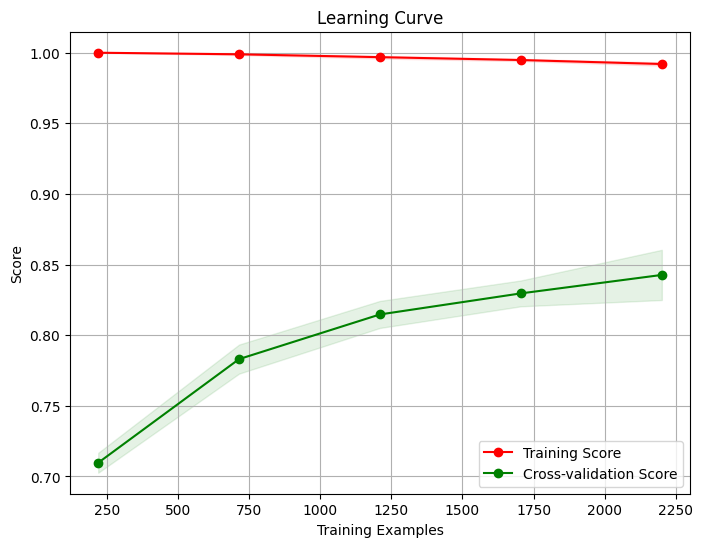

In [28]:
evaluate_model(catboost_classifier, X_train,
               X_test_external, y_train, y_test_external)

# Gaussian Naive Bayes

internal validation

Accuracy: 0.498546511627907
Precision: 0.4803030303030303
Recall: 0.9937304075235109
F1-Score: 0.6475995914198162
AUC-ROC: 0.5320955560652786
AUC-PR (Average Precision): 0.48019870278199356
Matthew's Correlation Coefficient (MCC): 0.16200650060084384
Log Loss: 18.074215725647406
Balanced Accuracy: 0.5320955560652785
Confusion Matrix:
[[ 26 343]
 [  2 317]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.07      0.13       369
           1       0.48      0.99      0.65       319

    accuracy                           0.50       688
   macro avg       0.70      0.53      0.39       688
weighted avg       0.72      0.50      0.37       688



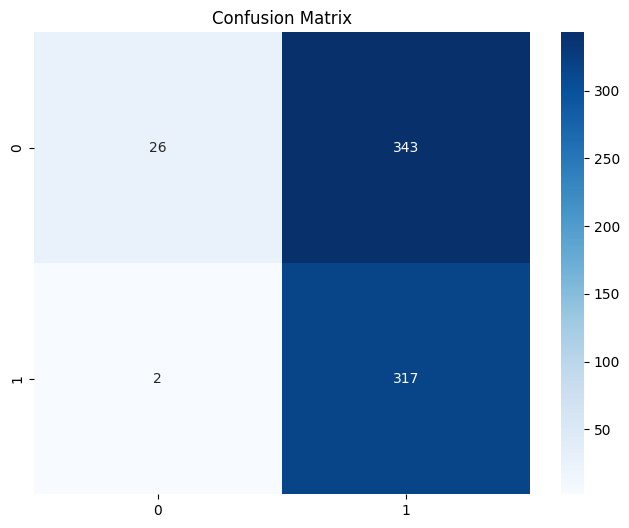

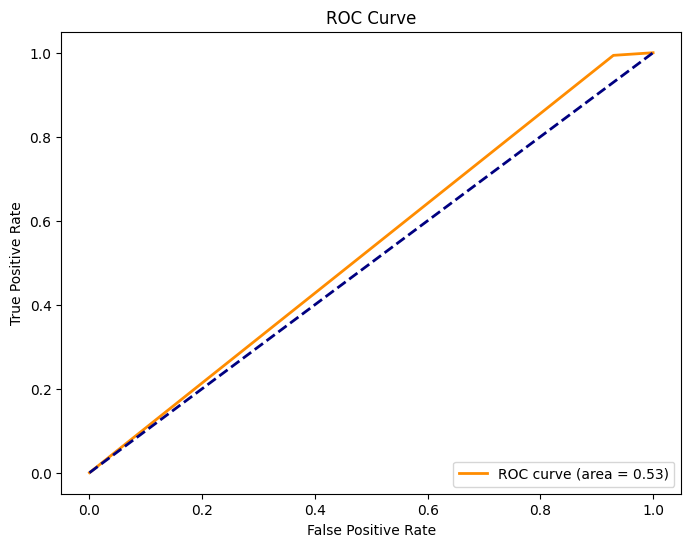

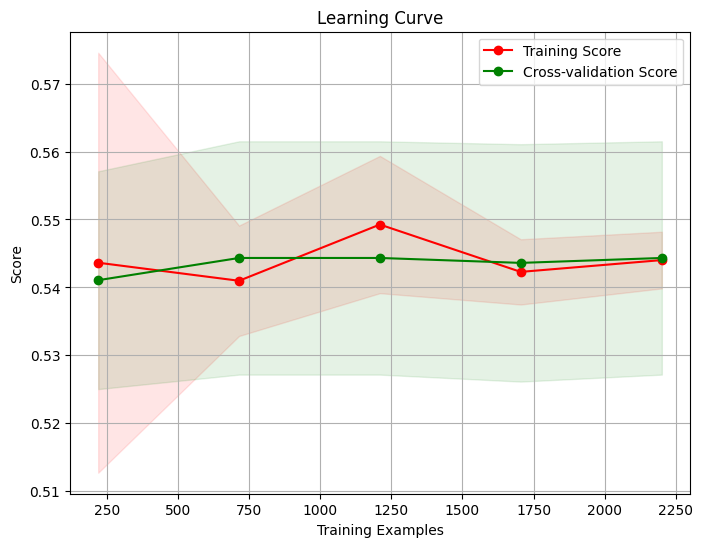

In [29]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()

evaluate_model(naive_bayes_classifier, X_train, X_test, y_train, y_test)

External validation

Accuracy: 0.513953488372093
Precision: 0.5071090047393365
Recall: 0.9953488372093023
F1-Score: 0.6718995290423861
AUC-ROC: 0.513953488372093
AUC-PR (Average Precision): 0.507075939601014
Matthew's Correlation Coefficient (MCC): 0.10326425862322713
Log Loss: 17.518891996105776
Balanced Accuracy: 0.513953488372093
Confusion Matrix:
[[ 14 416]
 [  2 428]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.03      0.06       430
           1       0.51      1.00      0.67       430

    accuracy                           0.51       860
   macro avg       0.69      0.51      0.37       860
weighted avg       0.69      0.51      0.37       860



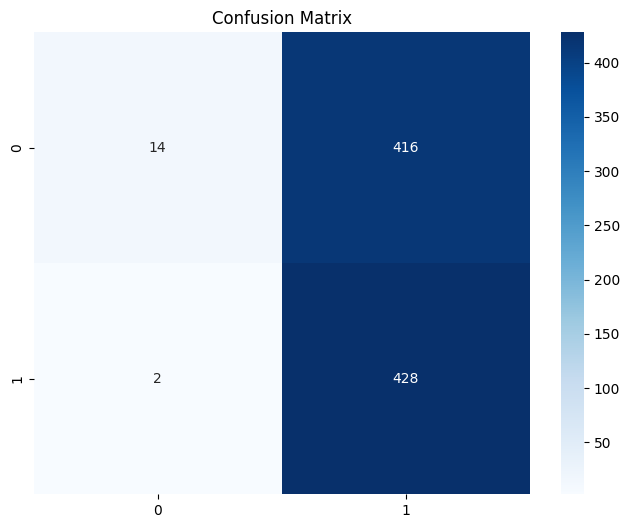

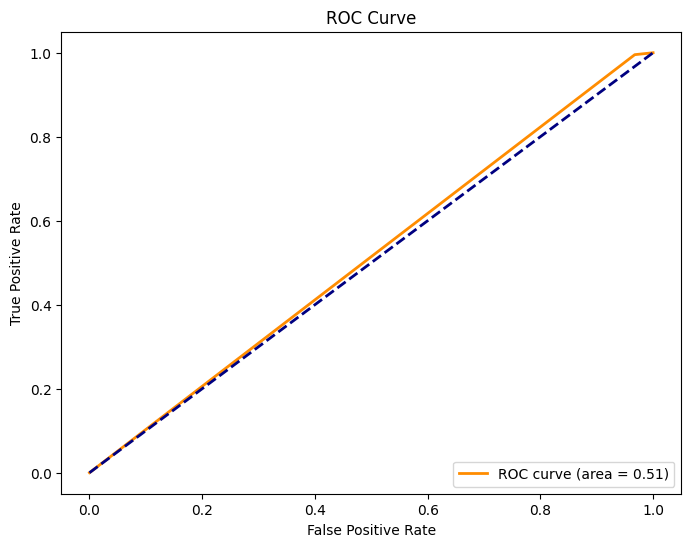

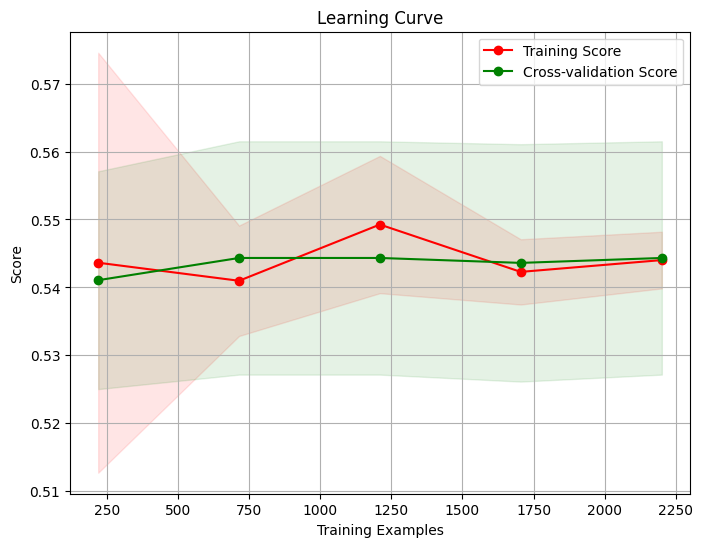

In [30]:
evaluate_model(naive_bayes_classifier, X_train,
               X_test_external, y_train, y_test_external)

# Multinomial Naive Bayes

it doesn't look like multinomial will work

internal validation

In [33]:
# from sklearn.naive_bayes import MultinomialNB

# multinomial_naive_bayes_classifier = MultinomialNB()

# evaluate_model(multinomial_naive_bayes_classifier,
#                X_train, X_test, y_train, y_test)

External Validation

In [34]:
# evaluate_model(multinomial_naive_bayes_classifier, X_train,
#                X_test_external, y_train, y_test_external)

# Bernoulii Naive Bayes

Internal validation

Accuracy: 0.5886627906976745
Precision: 0.5333333333333333
Recall: 0.9028213166144201
F1-Score: 0.6705471478463328
AUC-ROC: 0.6099472436730637
AUC-PR (Average Precision): 0.5265628417292411
Matthew's Correlation Coefficient (MCC): 0.2668671569532298
Log Loss: 14.826095798139757
Balanced Accuracy: 0.6099472436730637
Confusion Matrix:
[[117 252]
 [ 31 288]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.32      0.45       369
           1       0.53      0.90      0.67       319

    accuracy                           0.59       688
   macro avg       0.66      0.61      0.56       688
weighted avg       0.67      0.59      0.55       688



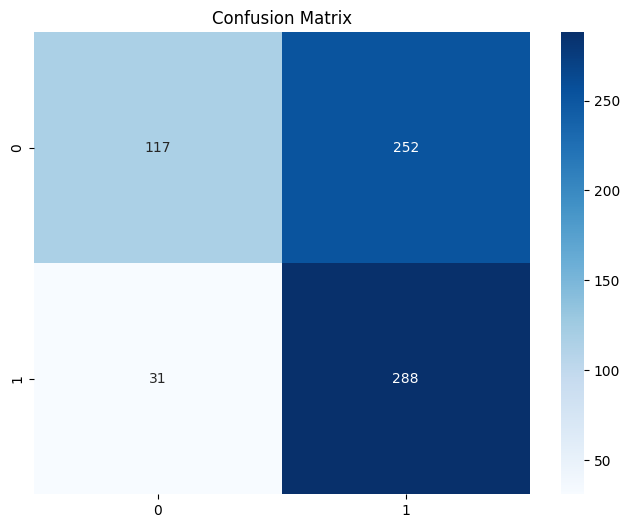

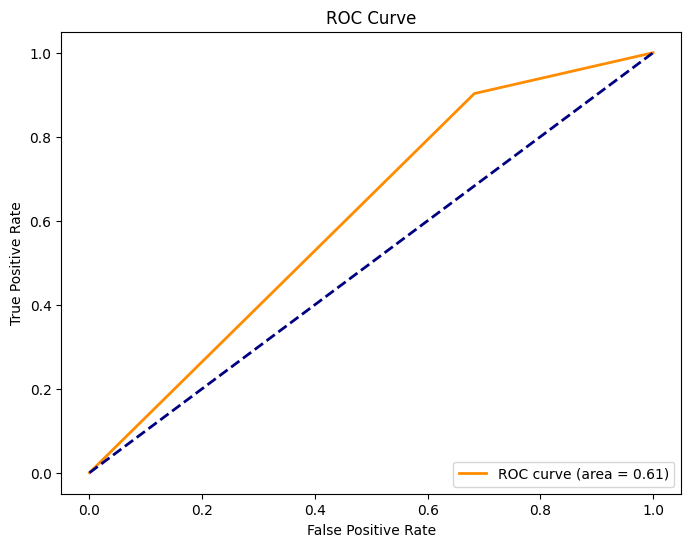

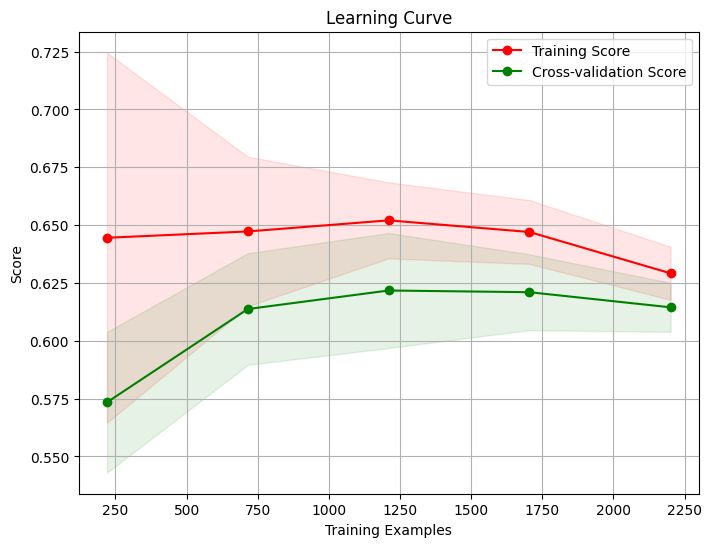

In [35]:
from sklearn.naive_bayes import BernoulliNB

bernoulli_naive_bayes_classifier = BernoulliNB()

evaluate_model(bernoulli_naive_bayes_classifier,
               X_train, X_test, y_train, y_test)

External Validation

Accuracy: 0.6255813953488372
Precision: 0.5820668693009119
Recall: 0.8906976744186047
F1-Score: 0.7040441176470588
AUC-ROC: 0.6255813953488372
AUC-PR (Average Precision): 0.5730967696331377
Matthew's Correlation Coefficient (MCC): 0.2962341508397493
Log Loss: 13.495414408483398
Balanced Accuracy: 0.6255813953488372
Confusion Matrix:
[[155 275]
 [ 47 383]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.36      0.49       430
           1       0.58      0.89      0.70       430

    accuracy                           0.63       860
   macro avg       0.67      0.63      0.60       860
weighted avg       0.67      0.63      0.60       860



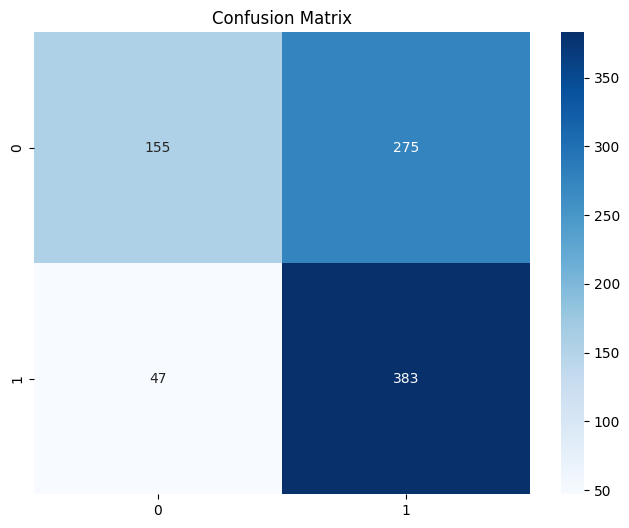

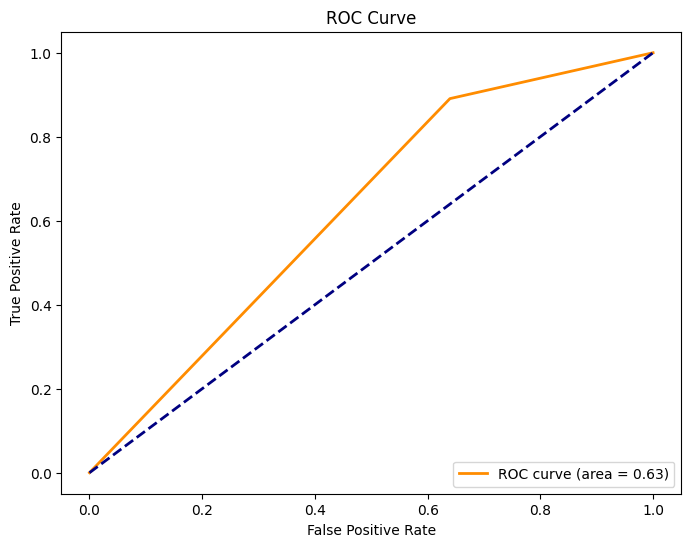

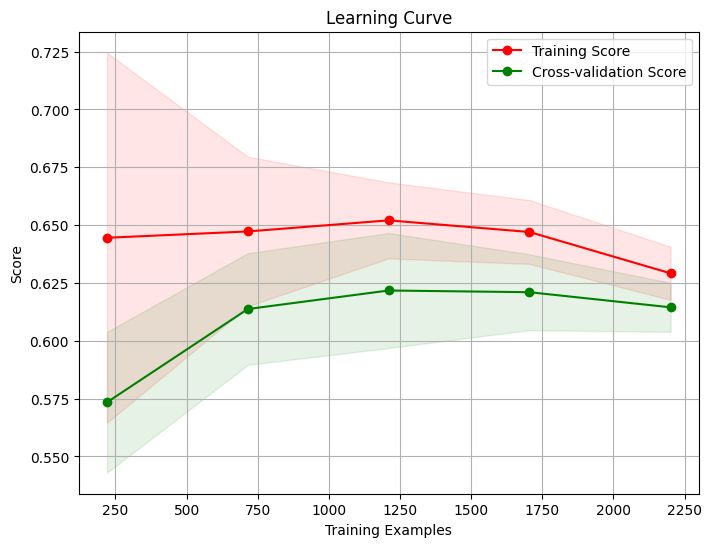

In [36]:
evaluate_model(bernoulli_naive_bayes_classifier, X_train,
               X_test_external, y_train, y_test_external)

# Linear Discriminant Analysis

Internal Validation

Accuracy: 0.7747093023255814
Precision: 0.7157894736842105
Recall: 0.8526645768025078
F1-Score: 0.7782546494992847
AUC-ROC: 0.7799908249866198
AUC-PR (Average Precision): 0.6786422821470093
Matthew's Correlation Coefficient (MCC): 0.5615845664003212
Log Loss: 8.120299818769126
Balanced Accuracy: 0.7799908249866198
Confusion Matrix:
[[261 108]
 [ 47 272]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       369
           1       0.72      0.85      0.78       319

    accuracy                           0.77       688
   macro avg       0.78      0.78      0.77       688
weighted avg       0.79      0.77      0.77       688



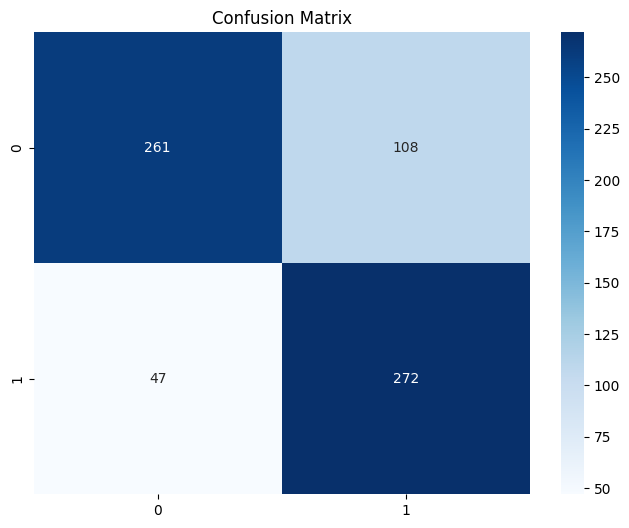

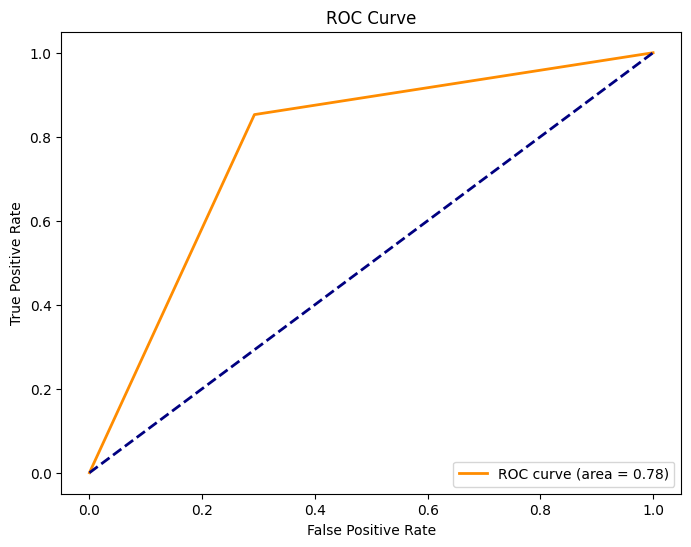

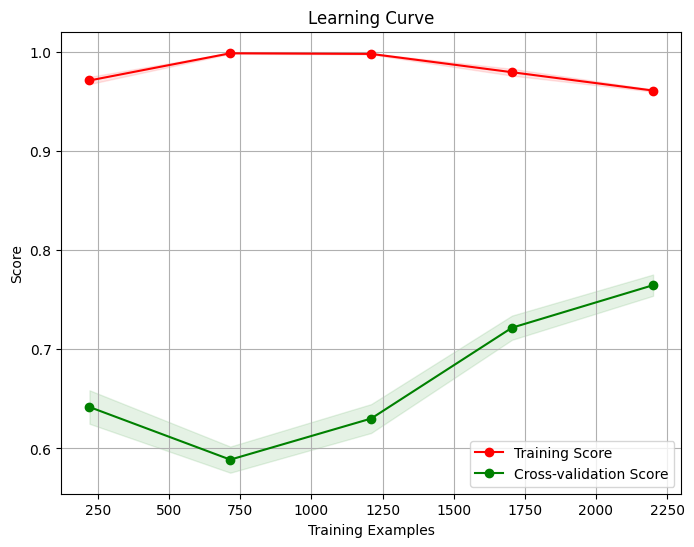

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis()

evaluate_model(lda_classifier, X_train, X_test, y_train, y_test)

External Validation

Accuracy: 0.7848837209302325
Precision: 0.7692307692307693
Recall: 0.813953488372093
F1-Score: 0.7909604519774011
AUC-ROC: 0.7848837209302326
AUC-PR (Average Precision): 0.7191413237924866
Matthew's Correlation Coefficient (MCC): 0.5707328555486
Log Loss: 7.753576601147294
Balanced Accuracy: 0.7848837209302326
Confusion Matrix:
[[325 105]
 [ 80 350]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       430
           1       0.77      0.81      0.79       430

    accuracy                           0.78       860
   macro avg       0.79      0.78      0.78       860
weighted avg       0.79      0.78      0.78       860



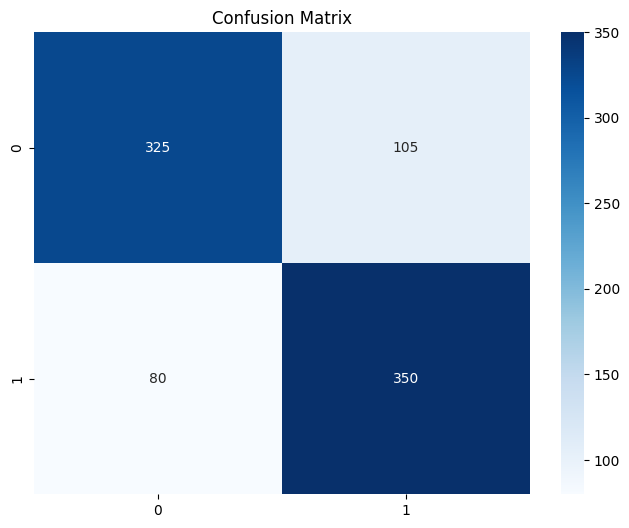

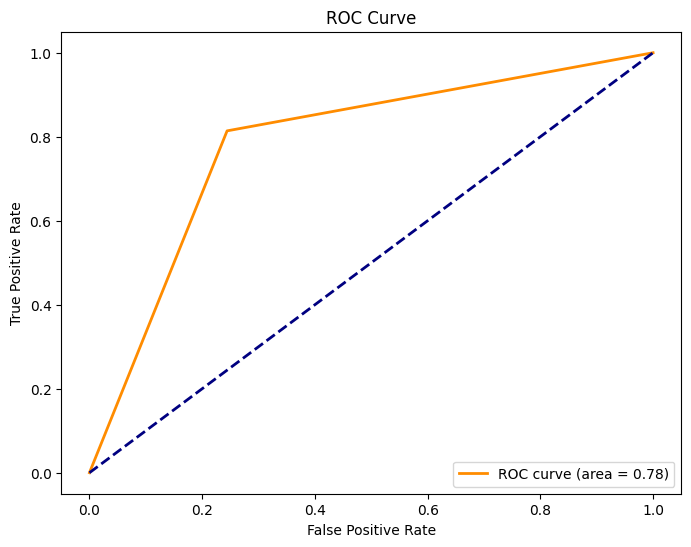

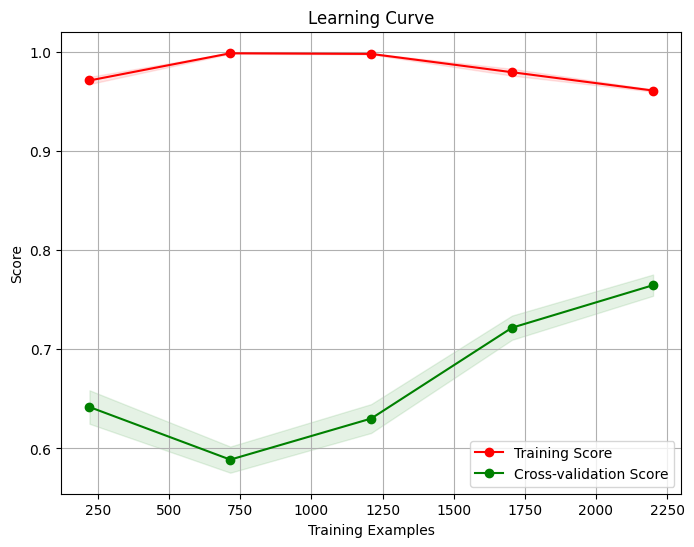

In [38]:
evaluate_model(lda_classifier, X_train, X_test_external,
               y_train, y_test_external)

# Quadratic Discriminant Analysis

Internal Validation

C:\Users\alikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.8183139534883721
Precision: 0.8391608391608392
Recall: 0.7523510971786834
F1-Score: 0.7933884297520661
AUC-ROC: 0.8138449252831086
AUC-PR (Average Precision): 0.7461691594473908
Matthew's Correlation Coefficient (MCC): 0.6351226308161723
Log Loss: 6.548628886104133
Balanced Accuracy: 0.8138449252831086
Confusion Matrix:
[[323  46]
 [ 79 240]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       369
           1       0.84      0.75      0.79       319

    accuracy                           0.82       688
   macro avg       0.82      0.81      0.82       688
weighted avg       0.82      0.82      0.82       688



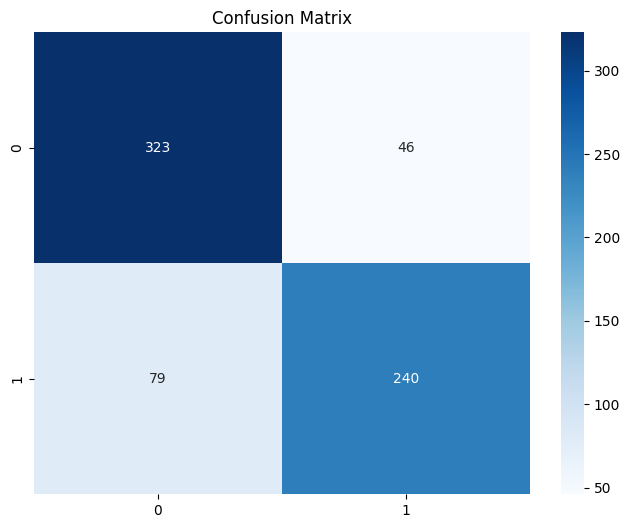

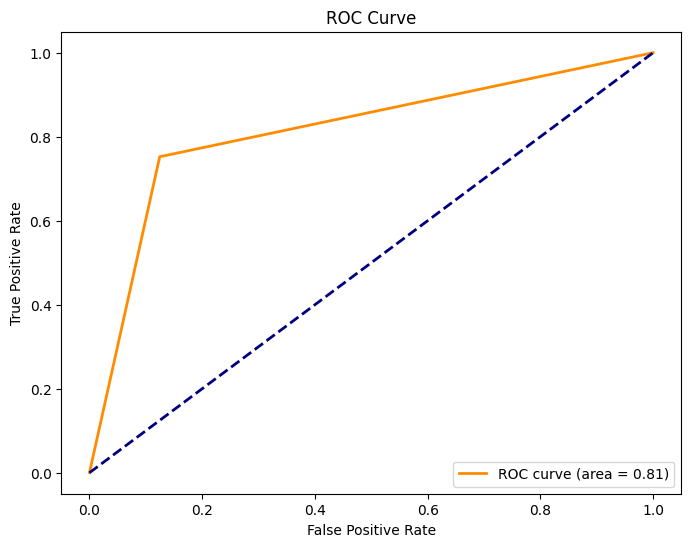

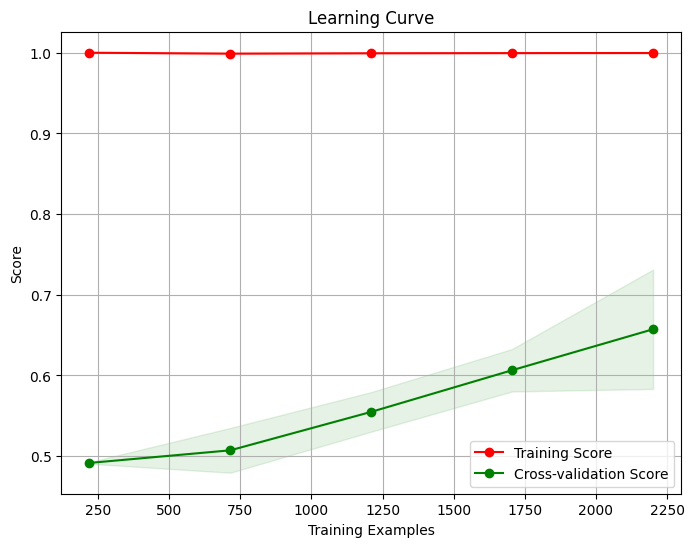

In [39]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_classifier = QuadraticDiscriminantAnalysis()

evaluate_model(qda_classifier, X_train, X_test, y_train, y_test)

External Validation

C:\Users\alikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.8290697674418605
Precision: 0.9609120521172638
Recall: 0.686046511627907
F1-Score: 0.8005427408412483
AUC-ROC: 0.8290697674418603
AUC-PR (Average Precision): 0.8162071055223088
Matthew's Correlation Coefficient (MCC): 0.6868385807324661
Log Loss: 6.160950056046769
Balanced Accuracy: 0.8290697674418605
Confusion Matrix:
[[418  12]
 [135 295]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       430
           1       0.96      0.69      0.80       430

    accuracy                           0.83       860
   macro avg       0.86      0.83      0.83       860
weighted avg       0.86      0.83      0.83       860



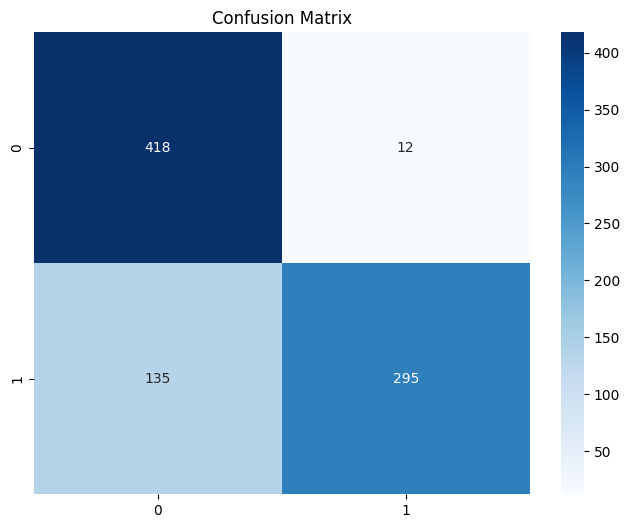

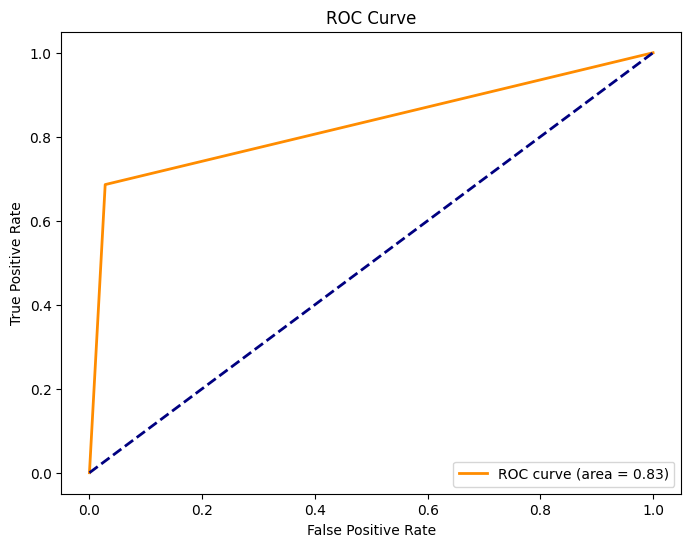

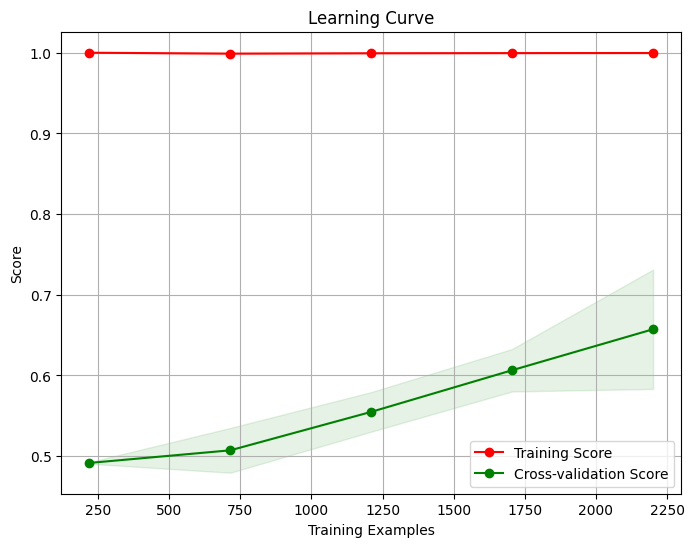

In [40]:
evaluate_model(qda_classifier, X_train, X_test_external,
               y_train, y_test_external)

# That's the end of traditional models, let's go for Neural Networks now

# We start with ANN

Internal Validation

Two hidden layers and a sigmoid activation function in the output layer. We use Adam optimizer and Binary cross-entropy loss function. We train 10 epochs with bach size of 32

In [41]:
from keras.models import Sequential
from keras.layers import Dense

# Define the architecture of the ANN
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam',
                  loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Call the evaluate_model function with ANN classifier
evaluate_model(ann_model, X_train, X_test, y_train, y_test)




Epoch 1/10


86/86 [==============================] - 1s 1ms/step - loss: 667679.0625 - accuracy: 0.5505
Epoch 2/10
86/86 [==============================] - 0s 1ms/step - loss: 318633.5000 - accuracy: 0.5752
Epoch 3/10
86/86 [==============================] - 0s 1ms/step - loss: 278478.3125 - accuracy: 0.5985
Epoch 4/10
86/86 [==============================] - 0s 1ms/step - loss: 247162.6250 - accuracy: 0.6043
Epoch 5/10
86/86 [==============================] - 0s 1ms/step - loss: 150658.7969 - accuracy: 0.6116
Epoch 6/10
86/86 [==============================] - 0s 1ms/step - loss: 250045.4219 - accuracy: 0.5672
Epoch 7/10
86/86 [==============================] - 0s 1ms/step - loss: 228590.8906 - accuracy: 0.5923
Epoch 8/10
86/86 [==============================] - 0s 1ms/step - loss: 119352.1172 - accuracy: 0.5908
Epoch 9/10
86/86 [==============================] - 0s 1ms/step - loss: 99663.6719 - accuracy: 0.6199
Epoch 10/10
22/22 [==============================] - 0s 714us/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

There's an issue where even for classification, you get a probability and not a class. let's use floor probability in our predictions for the same, which would mean changing our function a bit

In [54]:
def plot_learning_curve(history):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


def evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5, threshold=0.5):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
    from sklearn.metrics import log_loss, balanced_accuracy_score, confusion_matrix, classification_report
    from keras.callbacks import History
    from sklearn.metrics import roc_curve, auc

    # Train the model
    history = classifier.fit(X_train, y_train, epochs=10,
                             batch_size=32, verbose=1, validation_data=(X_test, y_test))

    # Make predictions (probabilities)
    y_pred_proba = classifier.predict(X_test)

    # Convert probabilities to binary predictions using a threshold
    y_pred = (y_pred_proba > threshold).astype(int)

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("AUC-PR (Average Precision):", average_precision)
    print("Matthew's Correlation Coefficient (MCC):", mcc)
    print("Log Loss:", logloss)
    print("Balanced Accuracy:", balanced_acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    # Plot learning curve
    plot_learning_curve(history)

# Example usage:
# evaluate_model(perceptron, X_train, X_test, y_train, y_test)

Epoch 1/10
86/86 [==============================] - 1s 1ms/step - loss: 500294.2188 - accuracy: 0.5549
Epoch 2/10
86/86 [==============================] - 0s 1ms/step - loss: 445213.4062 - accuracy: 0.5767
Epoch 3/10
86/86 [==============================] - 0s 1ms/step - loss: 243982.5781 - accuracy: 0.5600
Epoch 4/10
86/86 [==============================] - 0s 1ms/step - loss: 397784.8438 - accuracy: 0.5865
Epoch 5/10
86/86 [==============================] - 0s 1ms/step - loss: 178369.2812 - accuracy: 0.6228
Epoch 6/10
86/86 [==============================] - 0s 1ms/step - loss: 179614.5156 - accuracy: 0.5919
Epoch 7/10
86/86 [==============================] - 0s 1ms/step - loss: 268434.4375 - accuracy: 0.5847
Epoch 8/10
86/86 [==============================] - 0s 1ms/step - loss: 369827.3125 - accuracy: 0.5963
Epoch 9/10
86/86 [==============================] - 0s 1ms/step - loss: 166479.4844 - accuracy: 0.6021
Epoch 10/10
86/86 [==============================] - 0s 1ms/step - loss: 

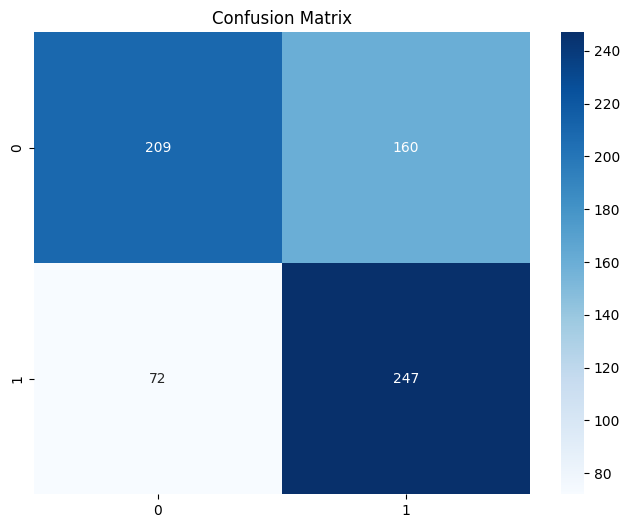

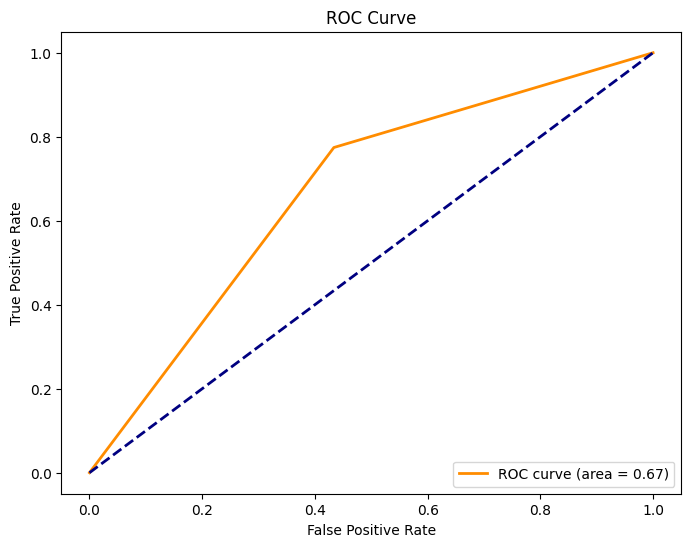

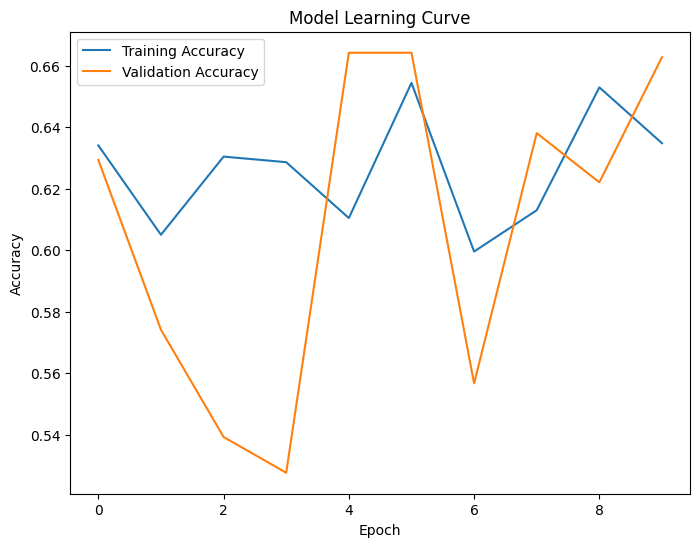

In [55]:
from keras.models import Sequential
from keras.layers import Dense

# Define the architecture of the ANN
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam',
                  loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Call the evaluate_model function with ANN classifier
evaluate_model(ann_model, X_train, X_test, y_train, y_test)

# Works :)

Let's try some optimisations

In [58]:
!pip install scikeras

In [59]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Wrap Keras model so it can be used by scikit-learn
ann_model_wrapper = KerasClassifier(build_fn=create_ann_model)

# Define the hyperparameters to tune
param_grid = {
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64],
    'optimizer': ['adam', 'rmsprop']
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=ann_model_wrapper,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_result = grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with best parameters
best_model = grid_result.best_estimator_
evaluate_model(best_model, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
